<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/Kc_House_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nama : Rizka Rahmadina

NIM : 1103204115

In [ ]:
pip install ipywidgets

In [ ]:
pip install plotly pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
from matplotlib.widgets import Slider

In [ ]:
file_path = '/content/kc_house_data.csv'

df = pd.read_csv(file_path)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
unique_value_counts = df.nunique()
print(unique_value_counts)

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [ ]:
summary = df.describe()

summary

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Daftar Fitur yang Ada dalam DataFrame:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


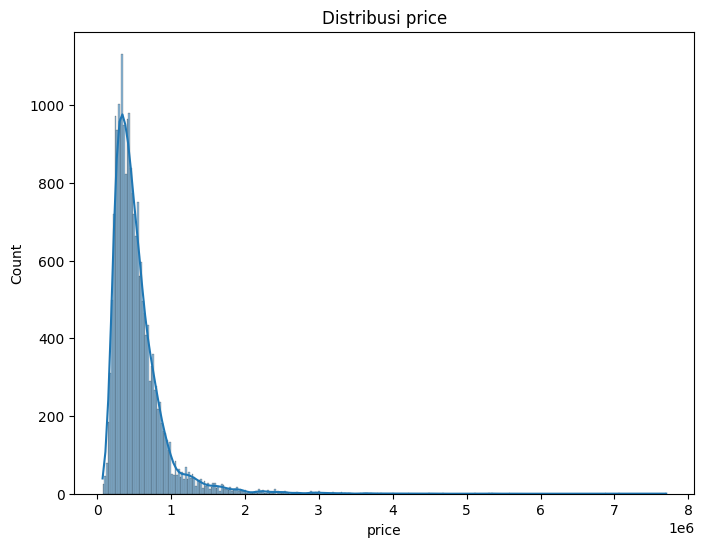

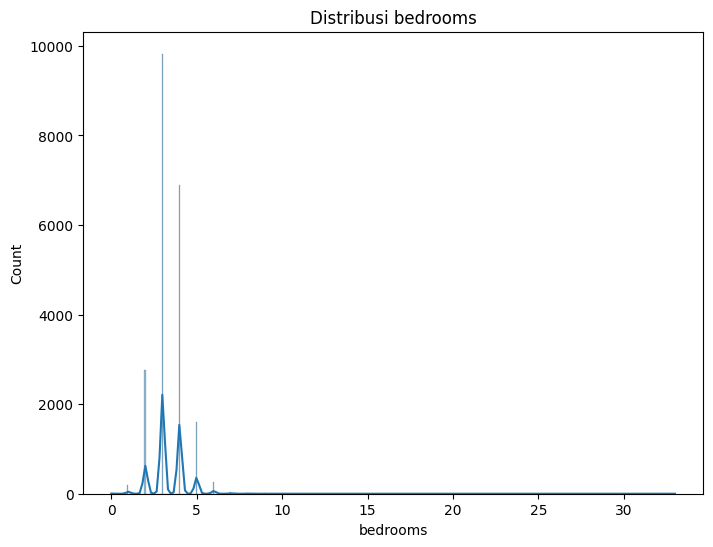

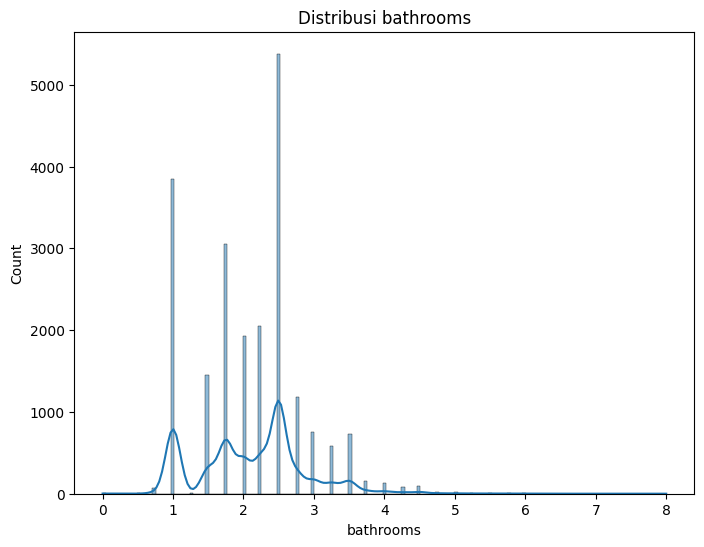

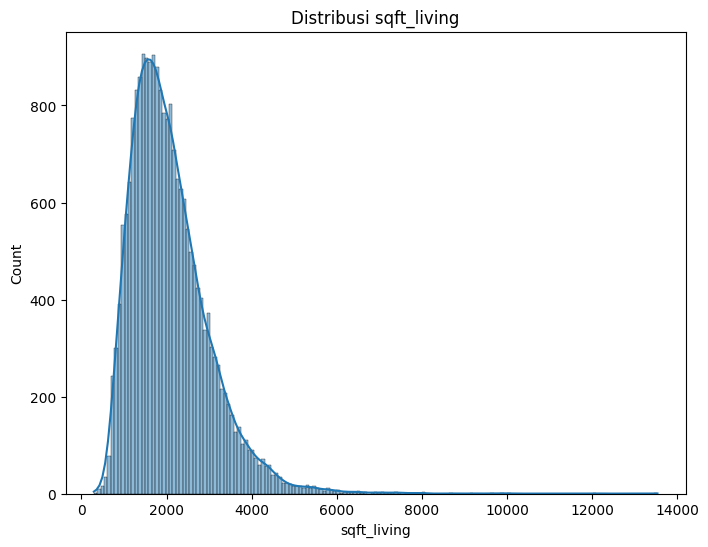

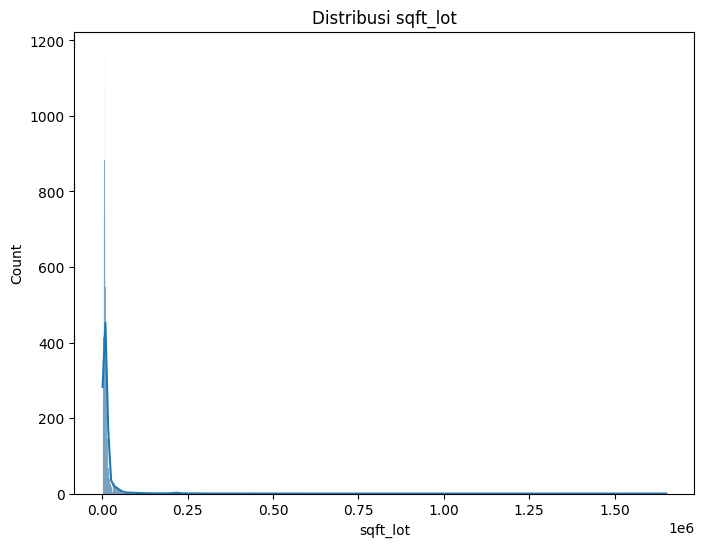

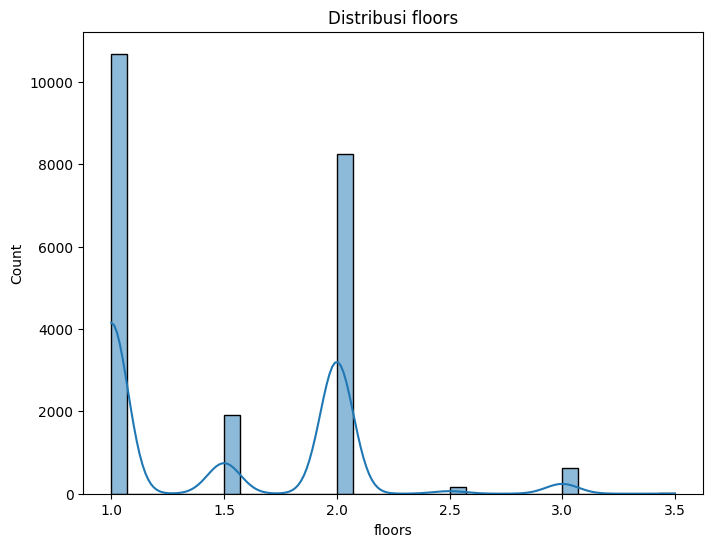

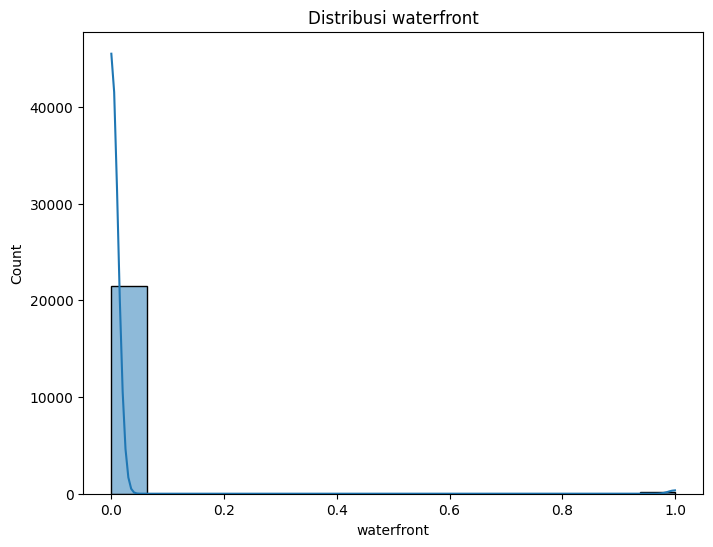

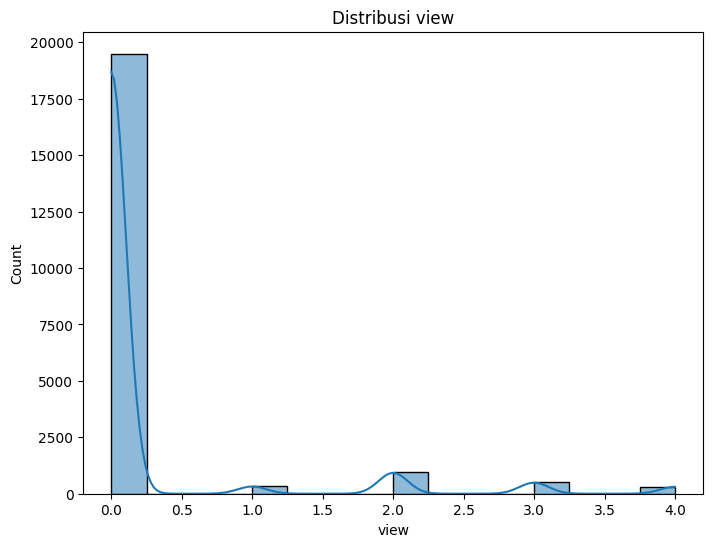

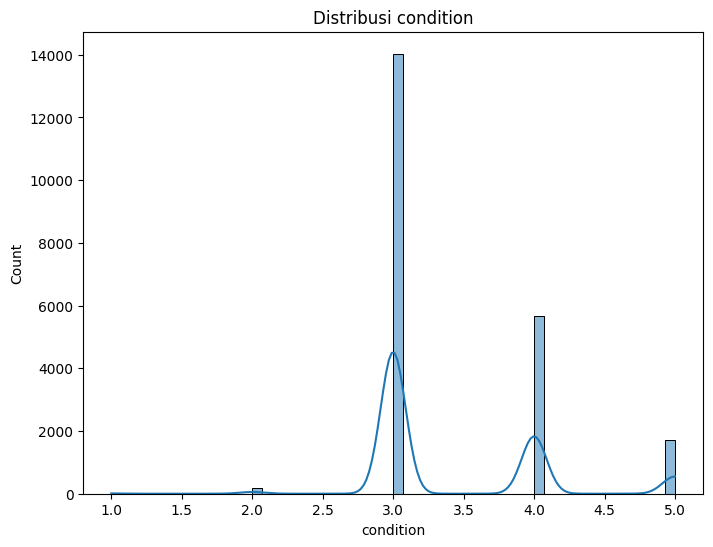

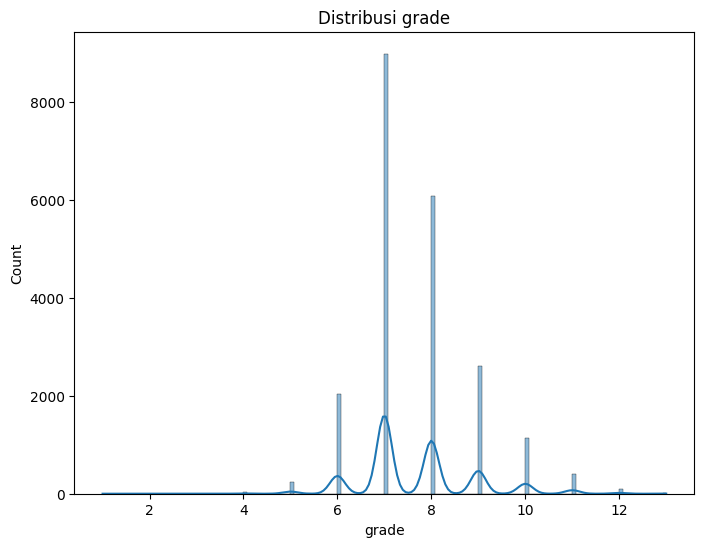

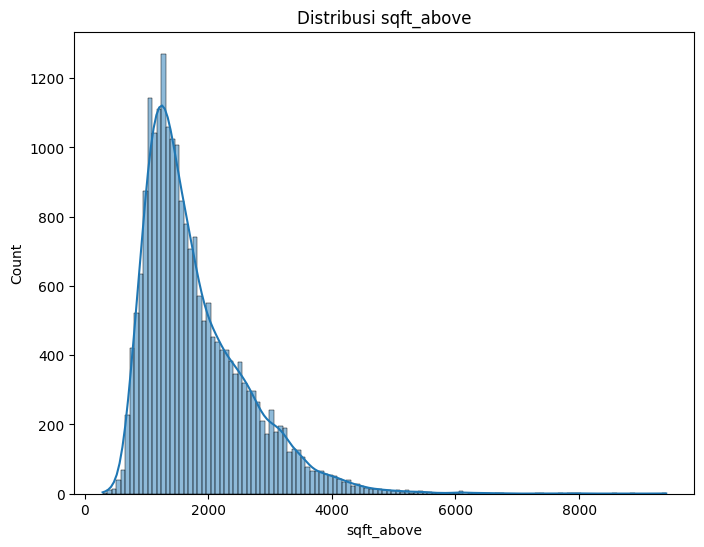

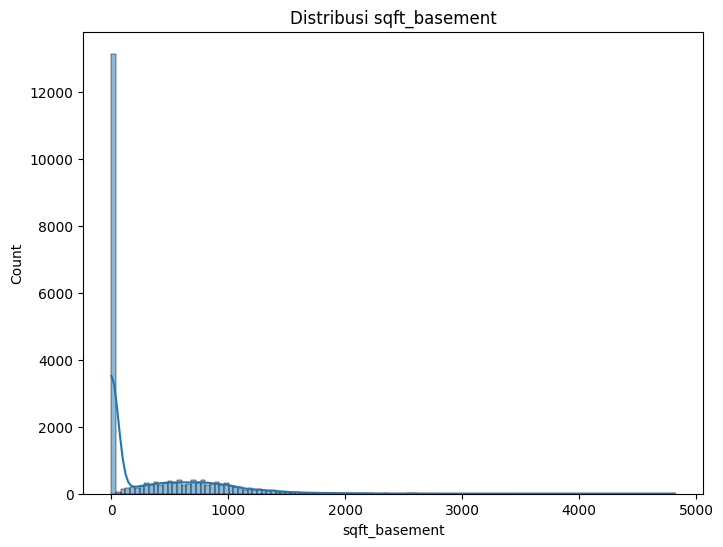

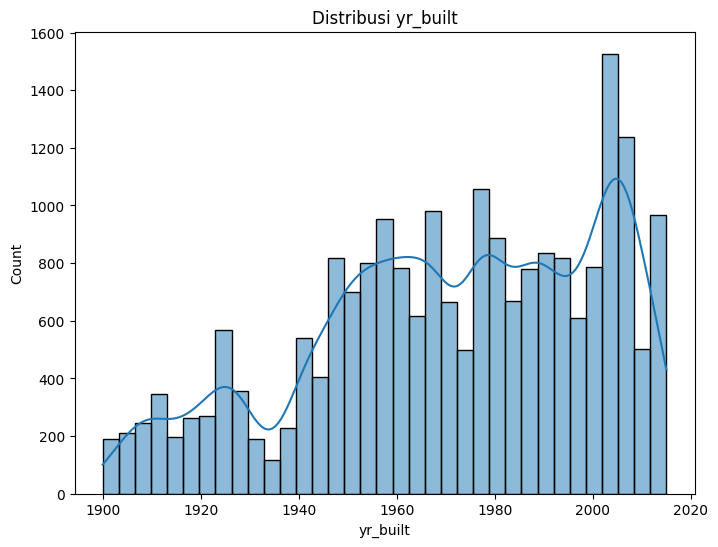

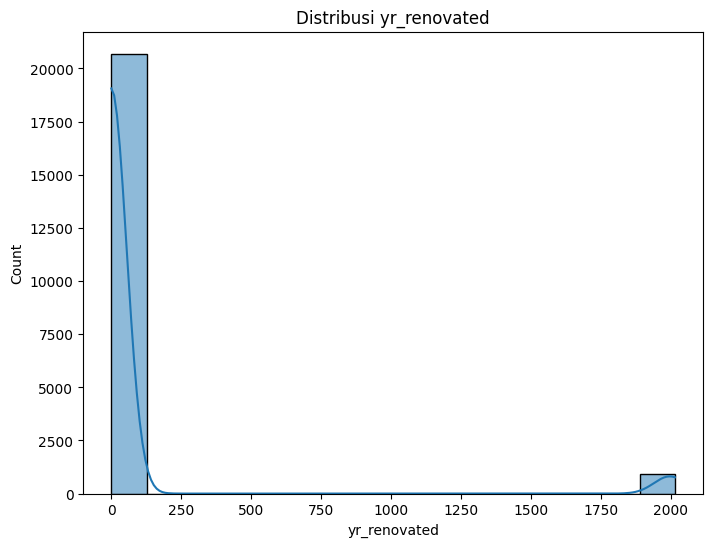

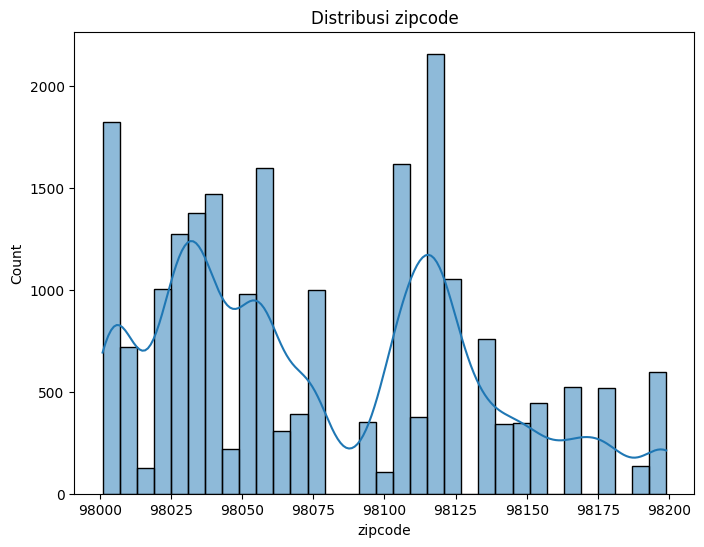

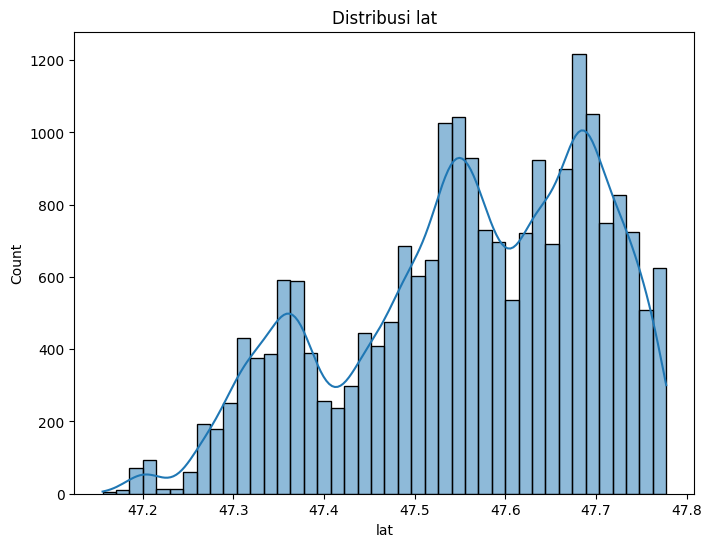

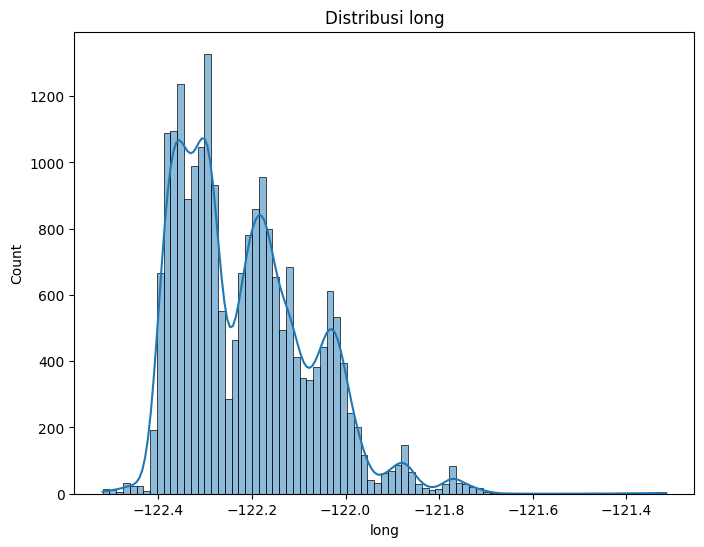

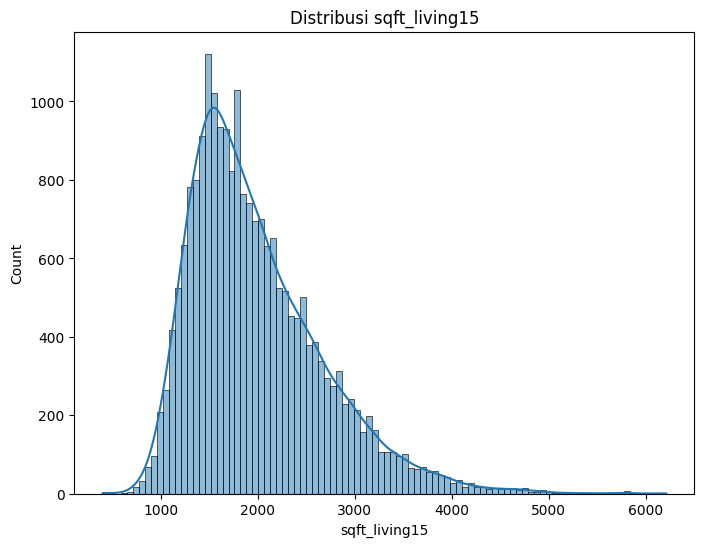

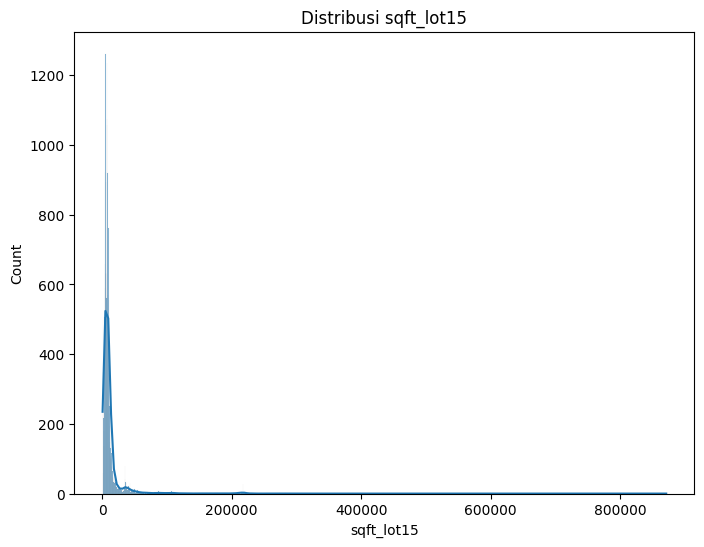

In [ ]:
print("Daftar Fitur yang Ada dalam DataFrame:")
print(df.columns)

# Periksa apakah 'sqft_living' dan fitur lainnya ada dalam DataFrame
features_to_visualize = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

# Visualisasikan hanya fitur-fitur yang benar-benar ada dalam DataFrame
for feature in features_to_visualize:
    if feature in df.columns:
        plt.figure(figsize=(8, 6))
        if df[feature].dtype == 'object':
            # Jika tipe data adalah objek (categorical)
            sns.countplot(x=feature, data=df)
            plt.xticks(rotation=45)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.title(f'Distribusi {feature}')
        else:
            # Jika tipe data adalah numerik (continuous)
            sns.histplot(df[feature], kde=True)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.title(f'Distribusi {feature}')

        plt.show()
    else:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")

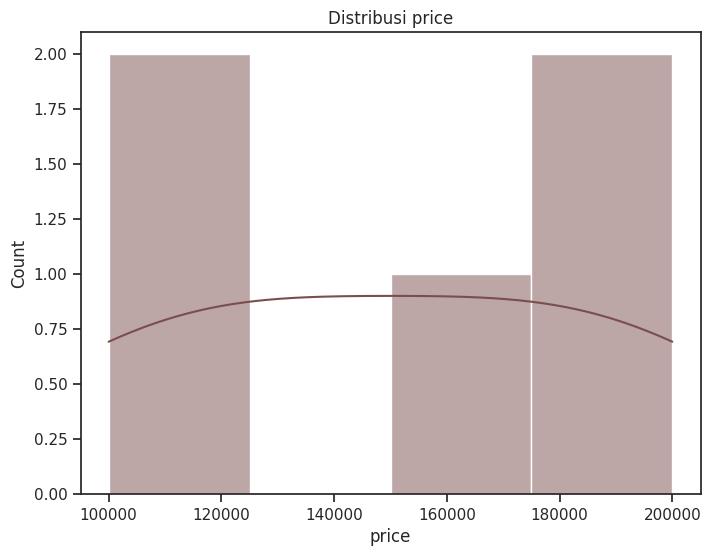

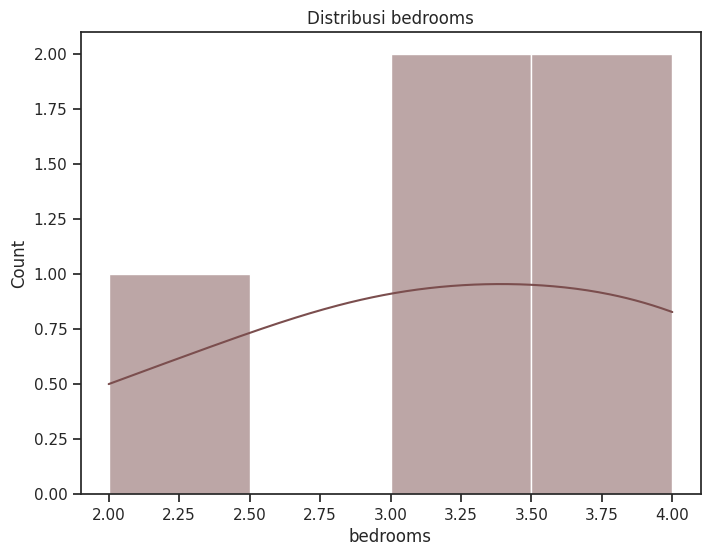

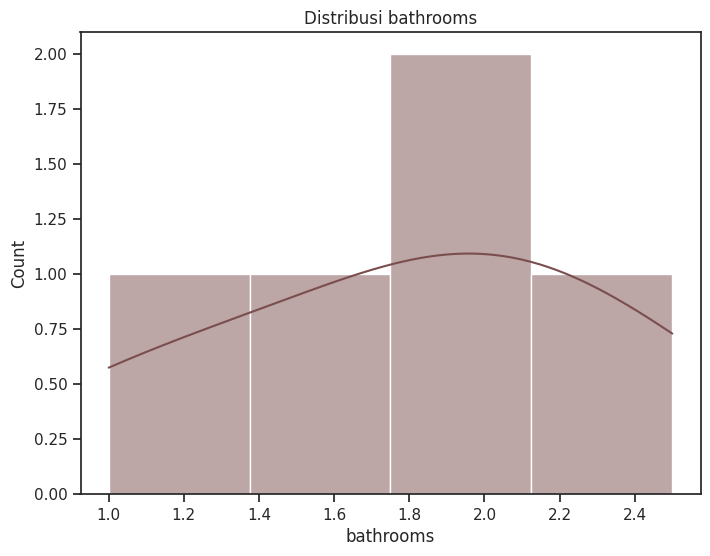

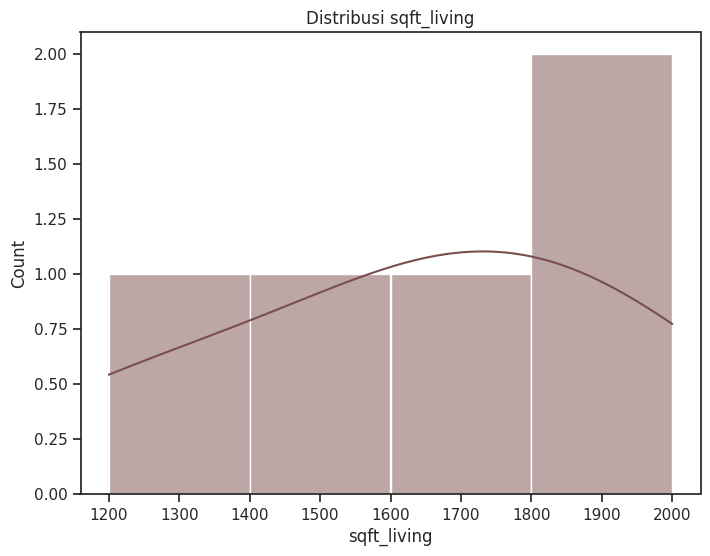

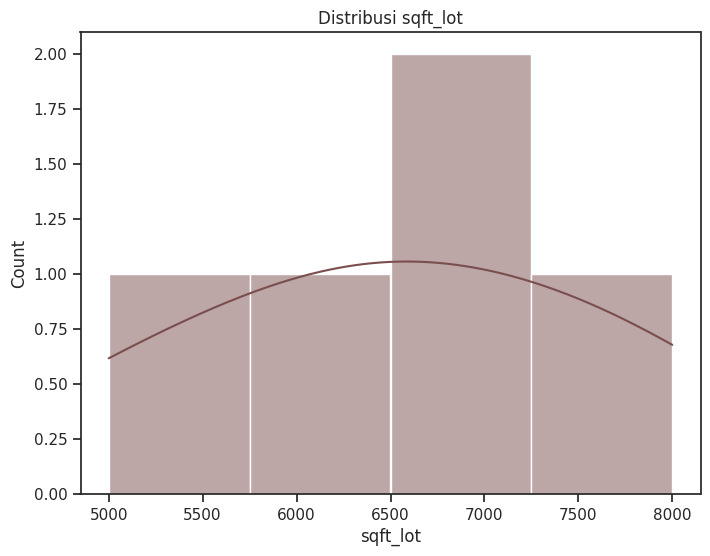

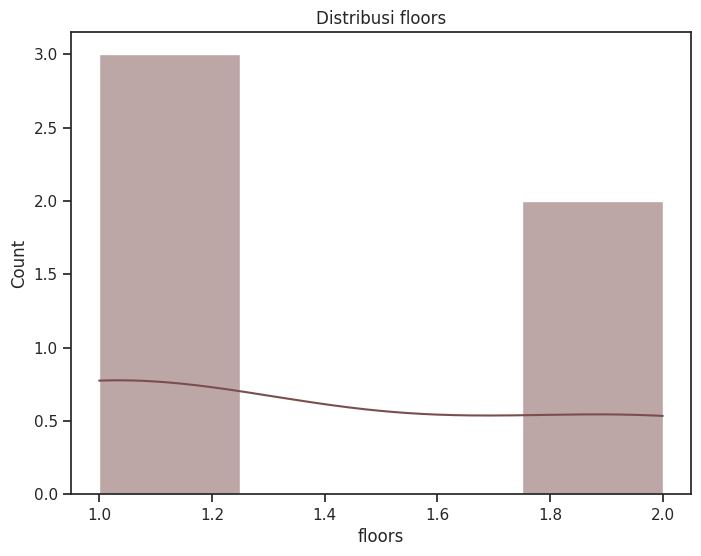

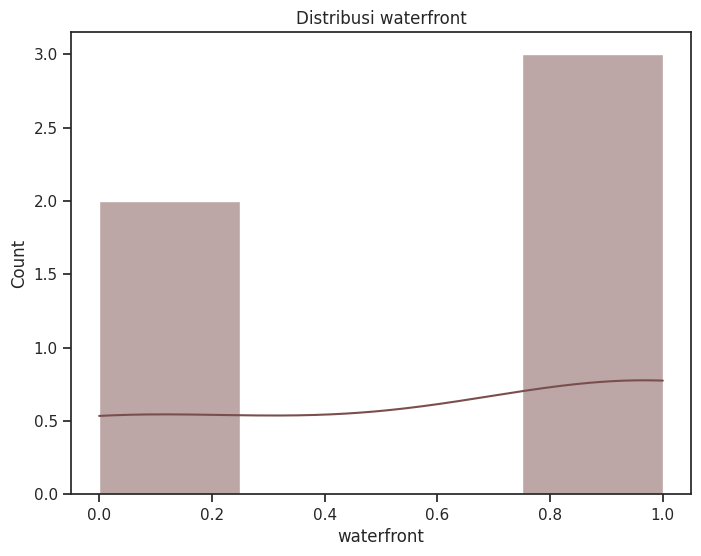

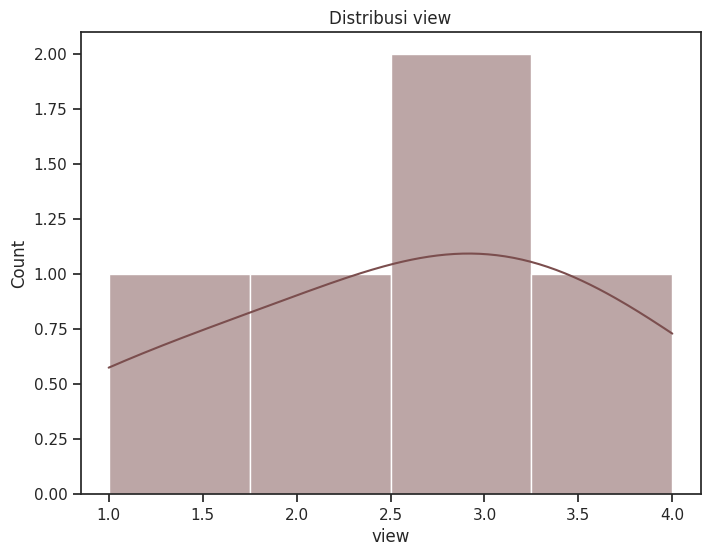

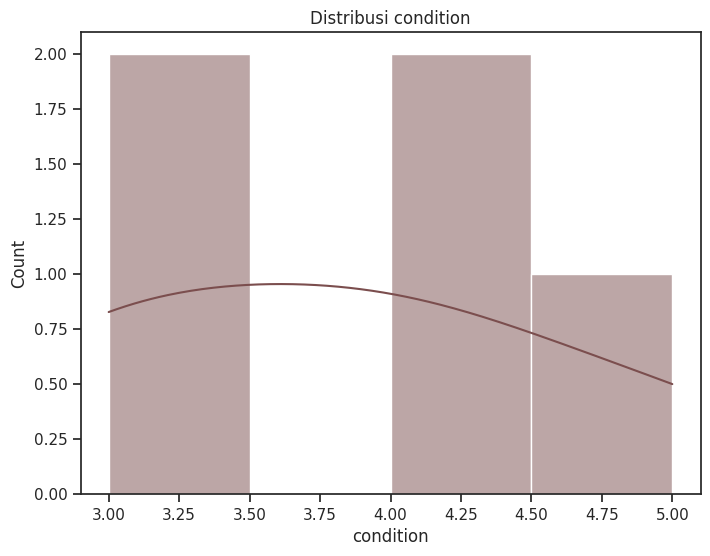

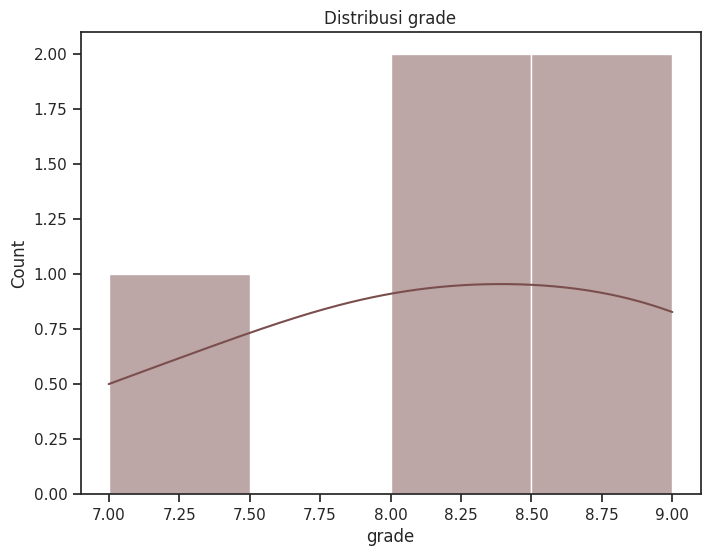

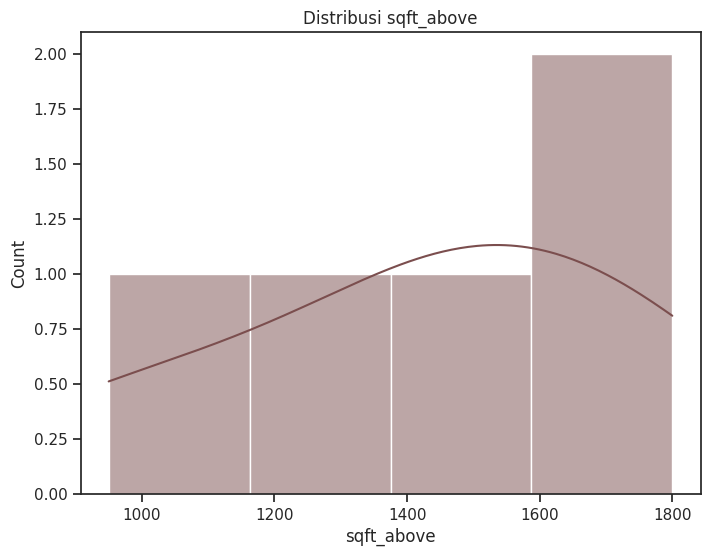

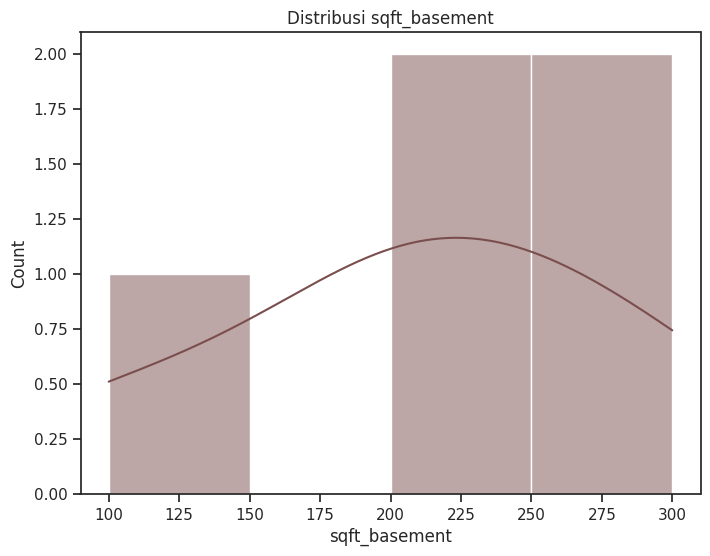

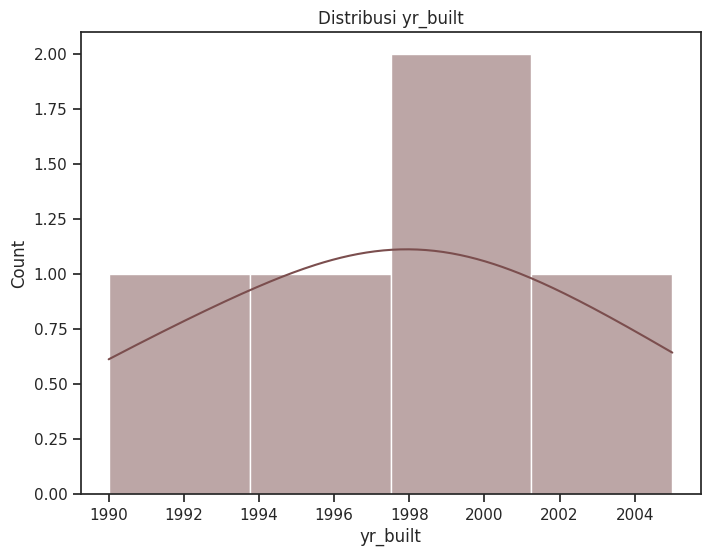

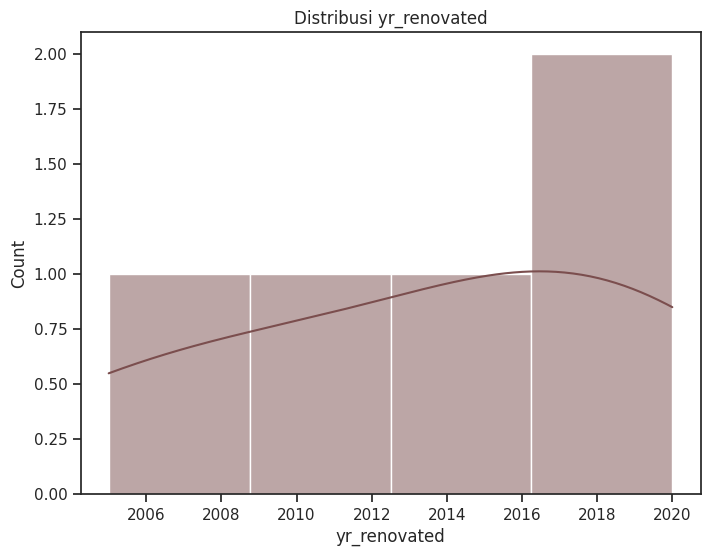

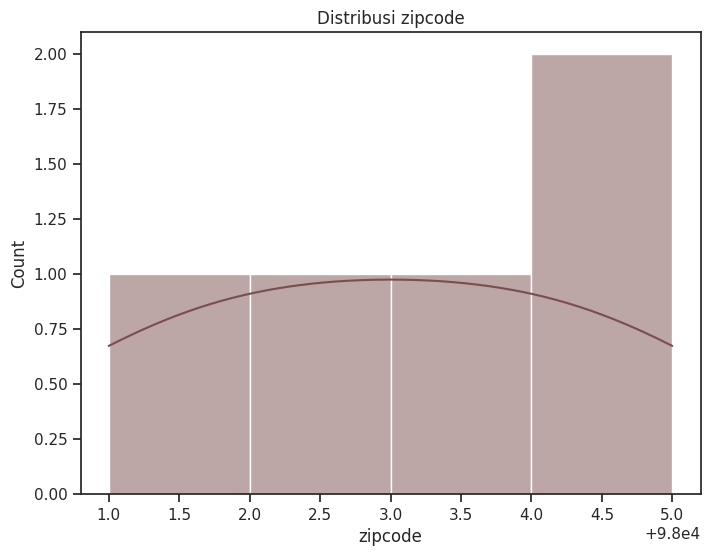

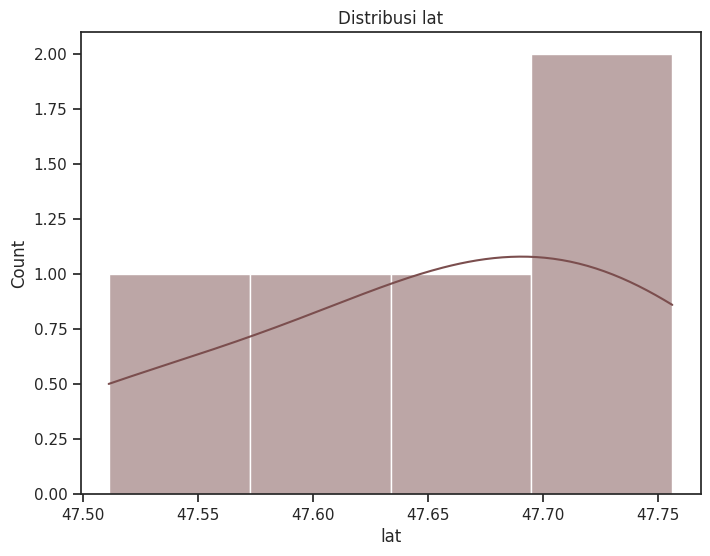

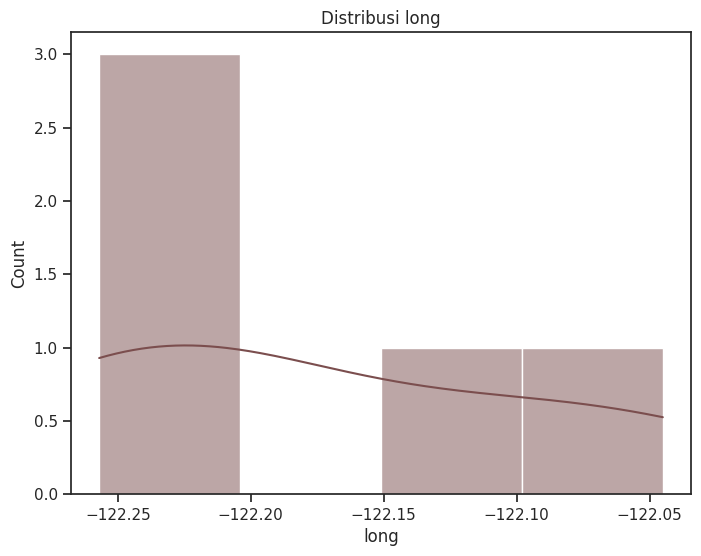

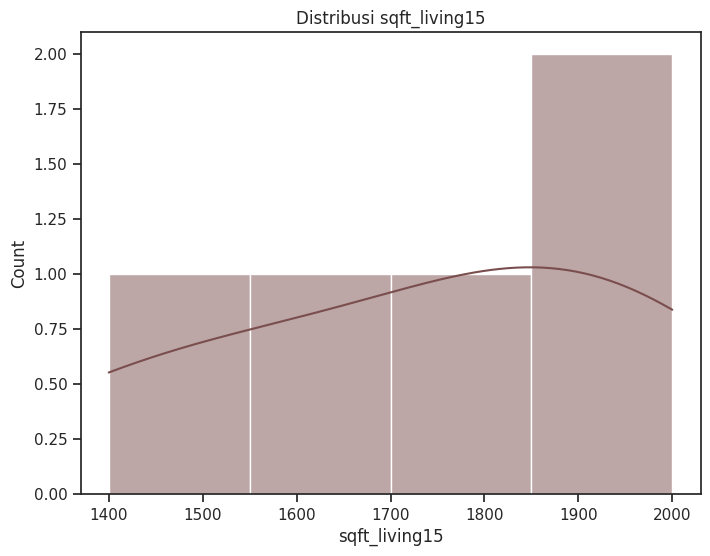

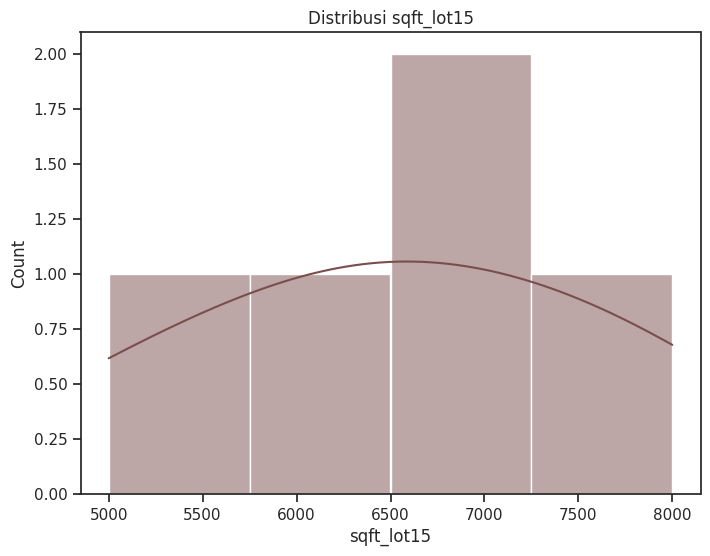

In [ ]:
# Mengatur palet warna menjadi pink
sns.set_palette("pink")

# Fitur yang ingin divisualisasikan
features_to_visualize = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

# Visualisasikan hanya fitur-fitur yang benar-benar ada dalam DataFrame
for feature in features_to_visualize:
    if feature in df.columns:
        plt.figure(figsize=(8, 6))
        if df[feature].dtype == 'object':
            # Jika tipe data adalah objek (categorical)
            sns.countplot(x=feature, data=df)
            plt.xticks(rotation=45)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.title(f'Distribusi {feature}')
        else:
            # Jika tipe data adalah numerik (continuous)
            sns.histplot(df[feature], kde=True)
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.title(f'Distribusi {feature}')

        plt.show()
    else:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")

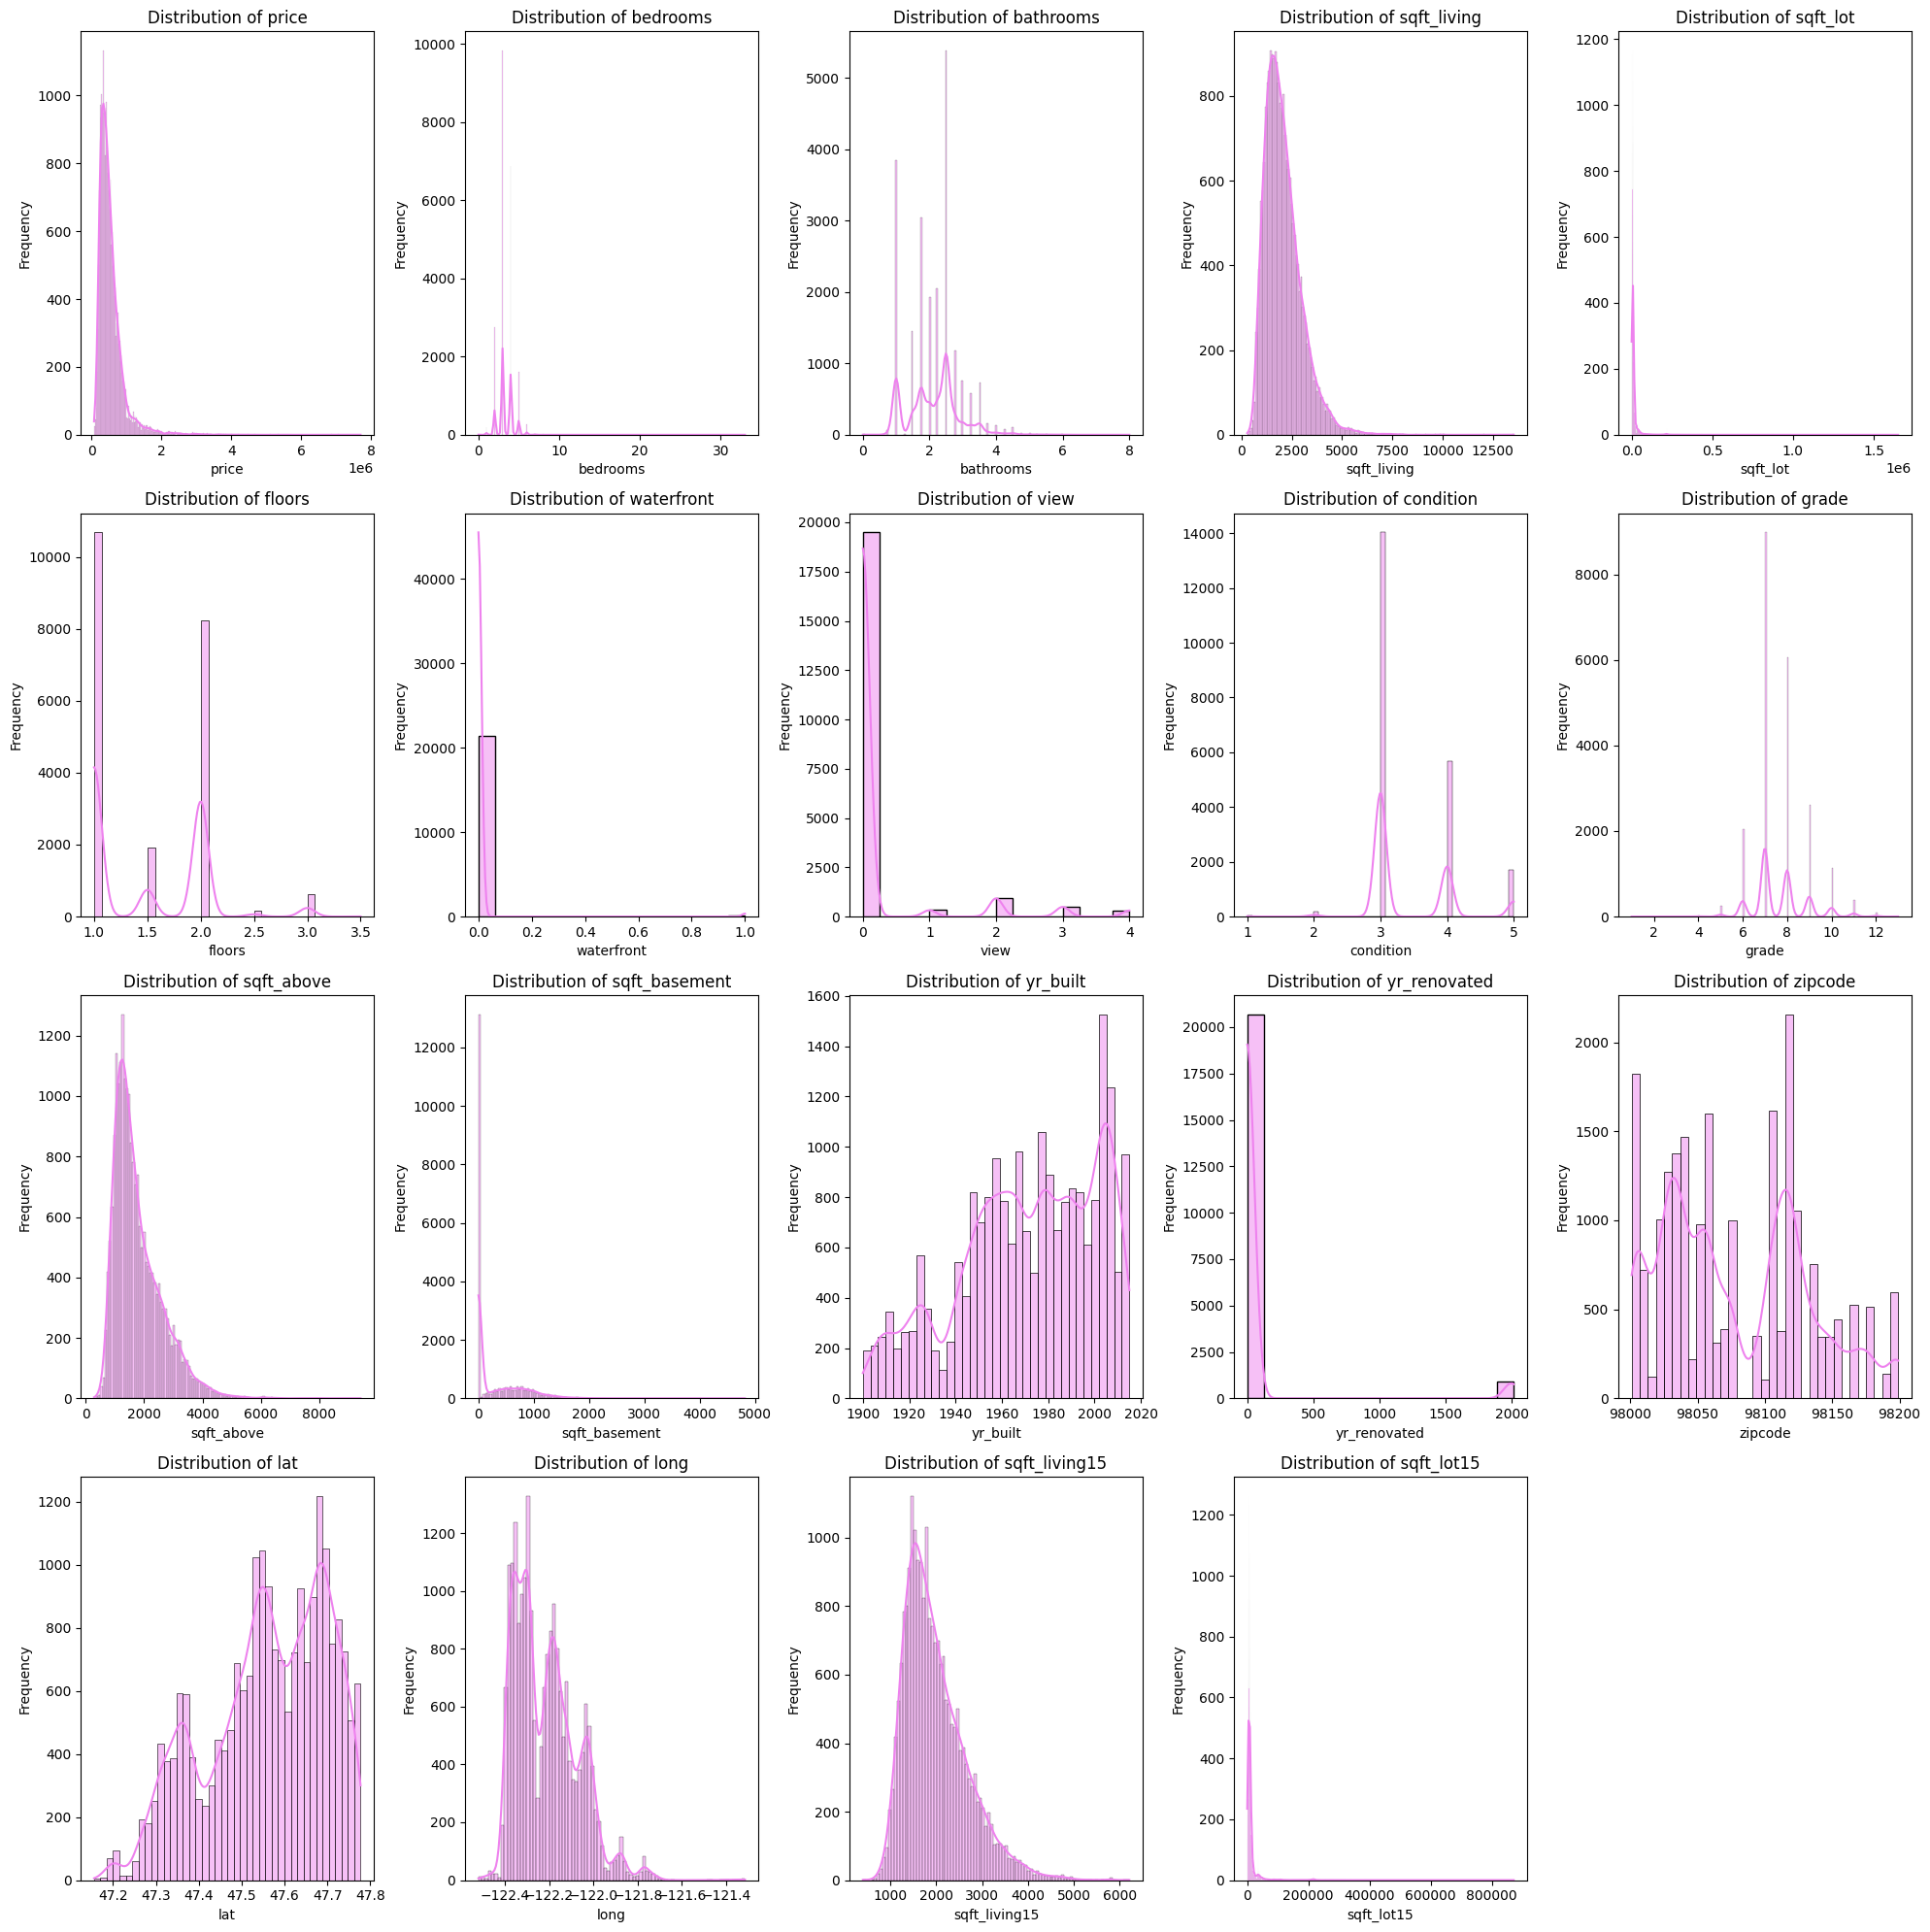

In [ ]:
# Pilih hanya fitur-fitur numerik yang ingin ditampilkan
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
                    'long', 'sqft_living15', 'sqft_lot15']

# Membuat subplot grid dengan 4 baris dan 5 kolom
fig, axes = plt.subplots(4, 5, figsize=(20, 20))

# Mengubah axes menjadi satu dimensi untuk memudahkan iterasi
axes = axes.flatten()

# Iterasi melalui fitur-fitur numerik
for i, feature in enumerate(numeric_features):
    # Menggambar histogram untuk setiap fitur pada subplot yang sesuai
    sns.histplot(df[feature], kde=True, color='violet', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', size=12)
    axes[i].set_xlabel(feature, size=10)
    axes[i].set_ylabel('Frequency', size=10)

# Menghapus subplot yang tidak digunakan
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

# Mengatur tata letak secara rapi
plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import interact, IntSlider

# Fungsi untuk memplot distribusi dengan bin width interaktif
def plot_distribution(feature, bin_width):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=bin_width, kde=True, color='coral')
    plt.title(f'Distribusi {feature} (Bin Width: {bin_width})', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

# Interaksi untuk memilih fitur dan bin width
interact(plot_distribution, feature=df.columns, bin_width=IntSlider(min=1, max=50, step=1, value=10))


interactive(children=(Dropdown(description='feature', options=('price', 'bedrooms', 'bathrooms', 'sqft_living'…

<function __main__.plot_distribution(feature, bin_width)>

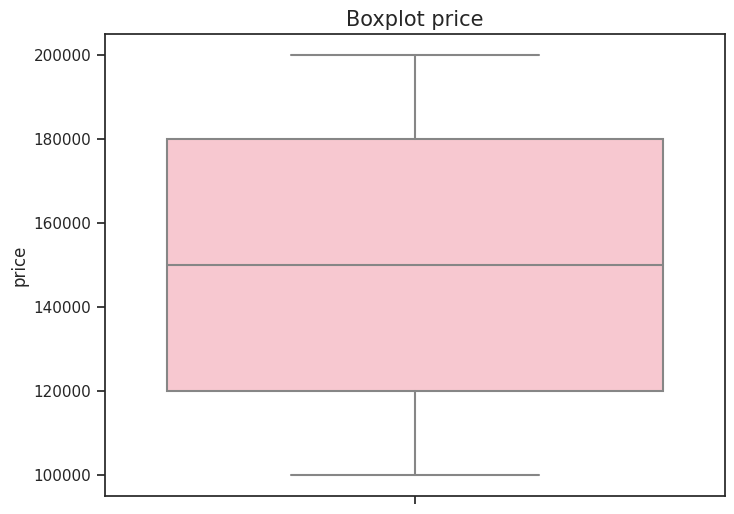

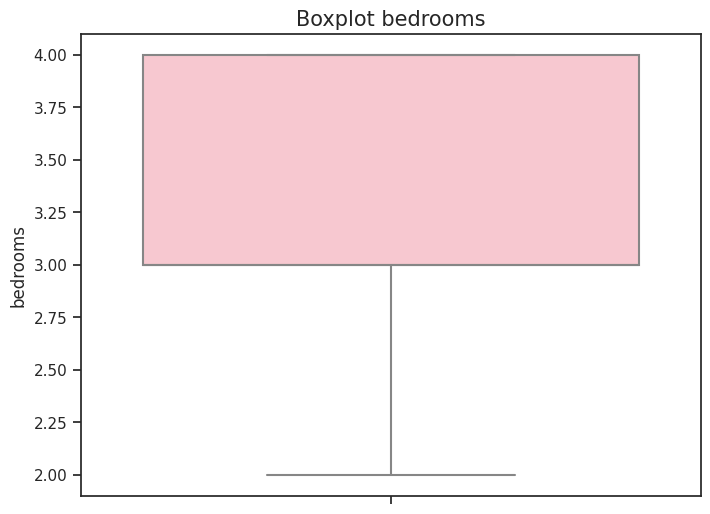

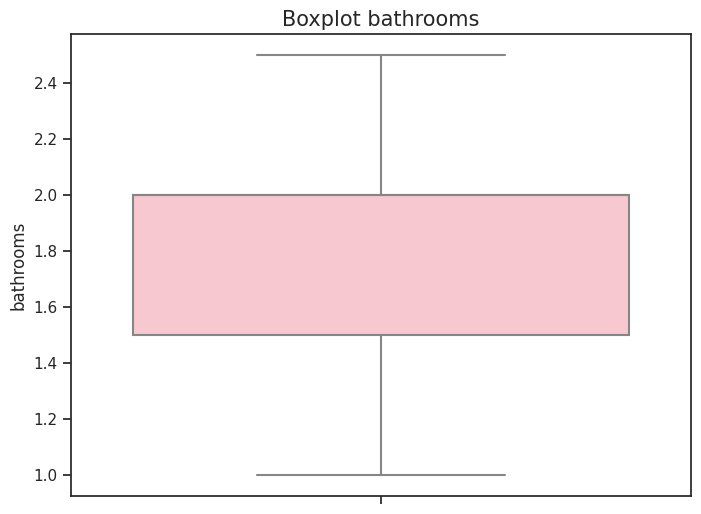

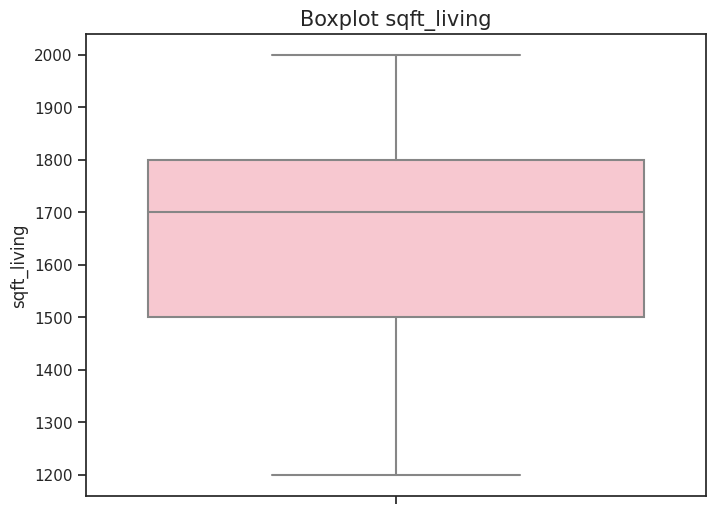

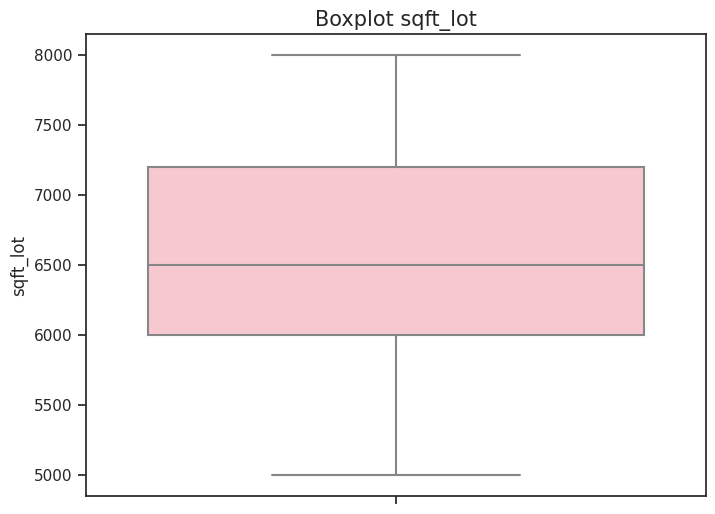

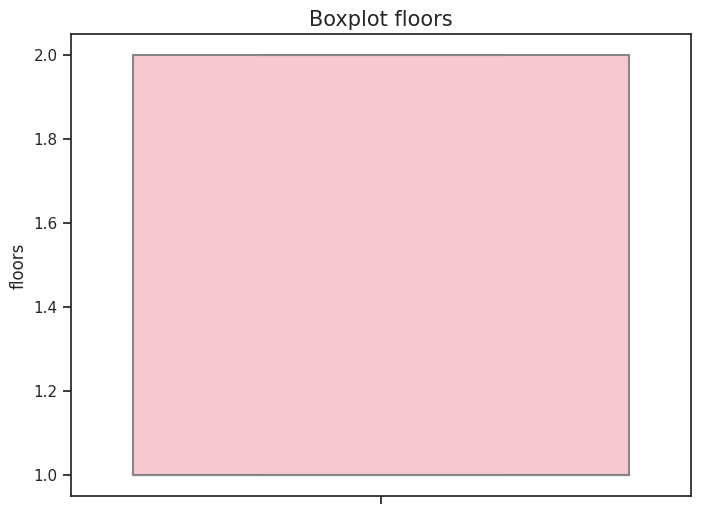

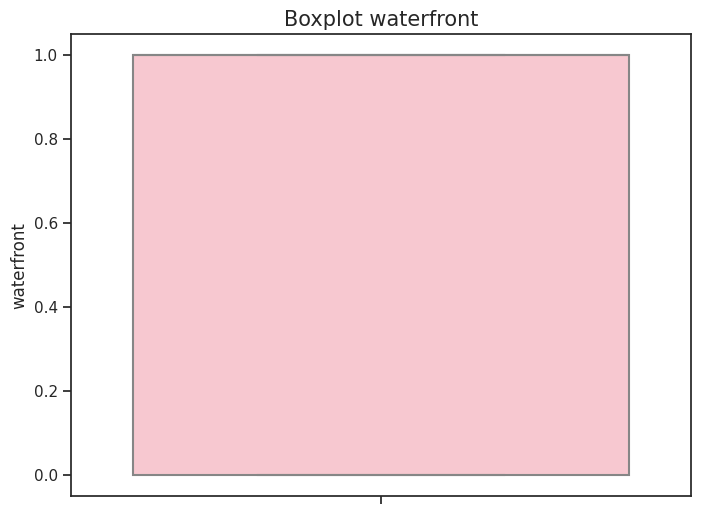

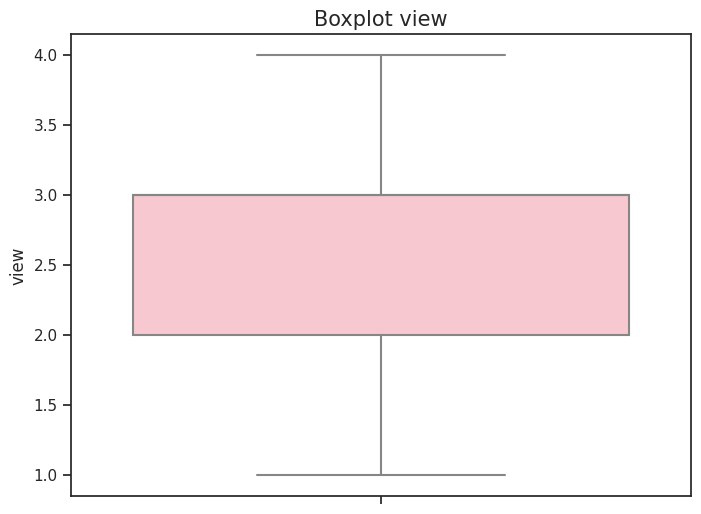

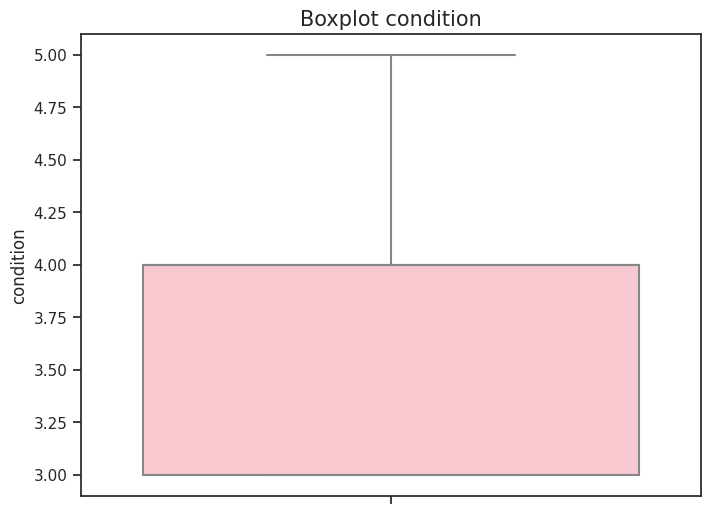

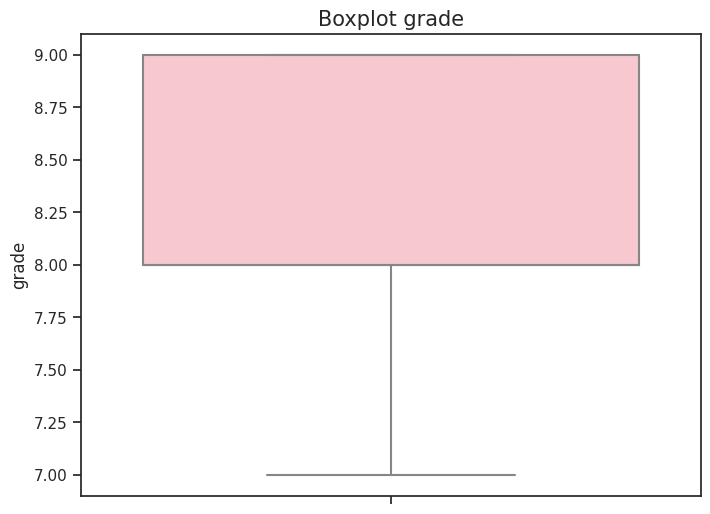

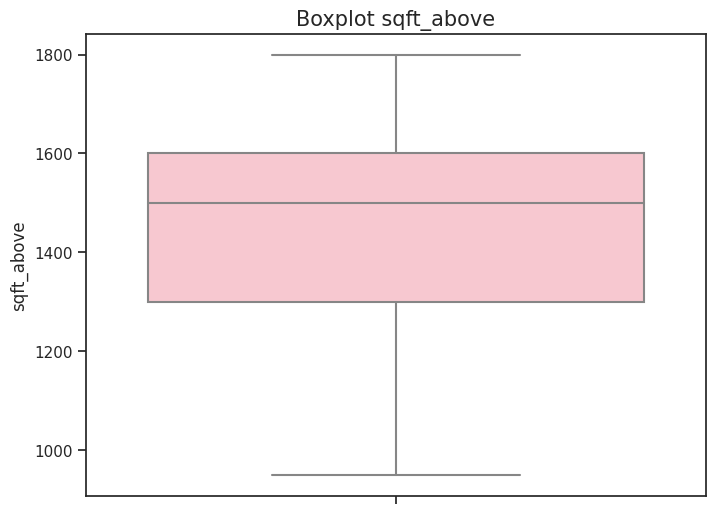

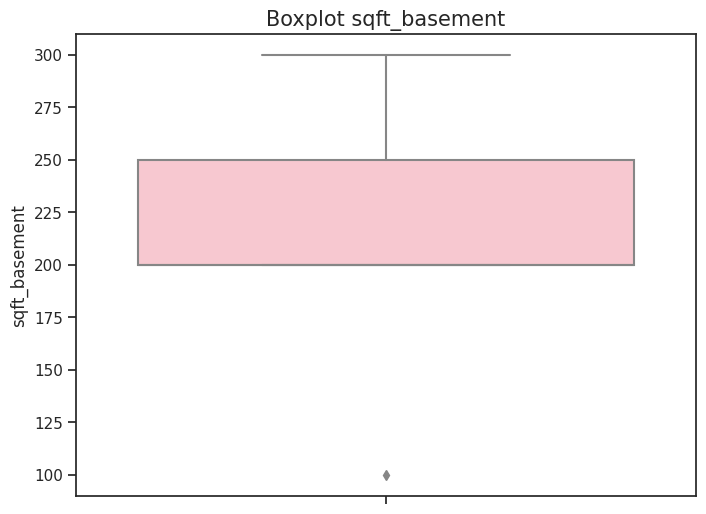

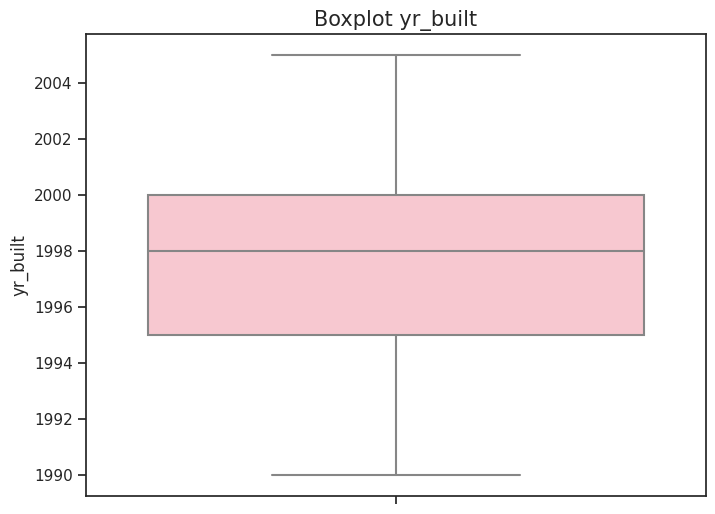

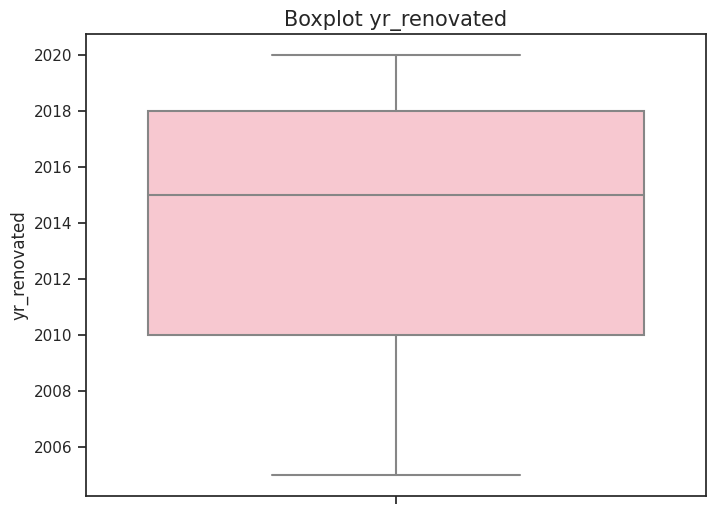

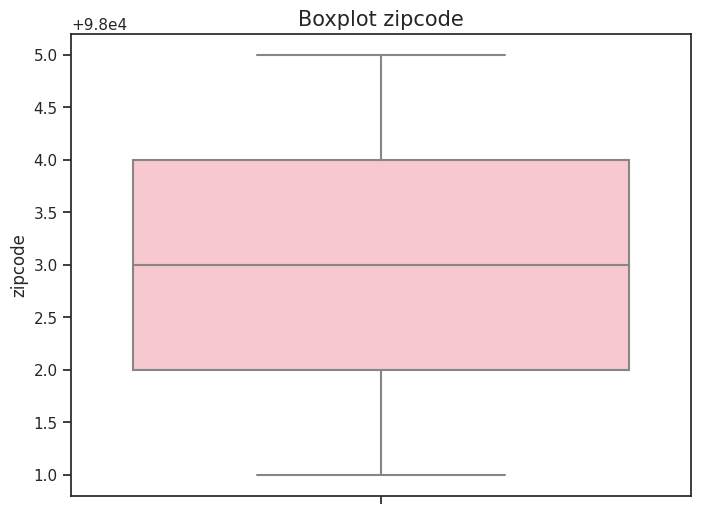

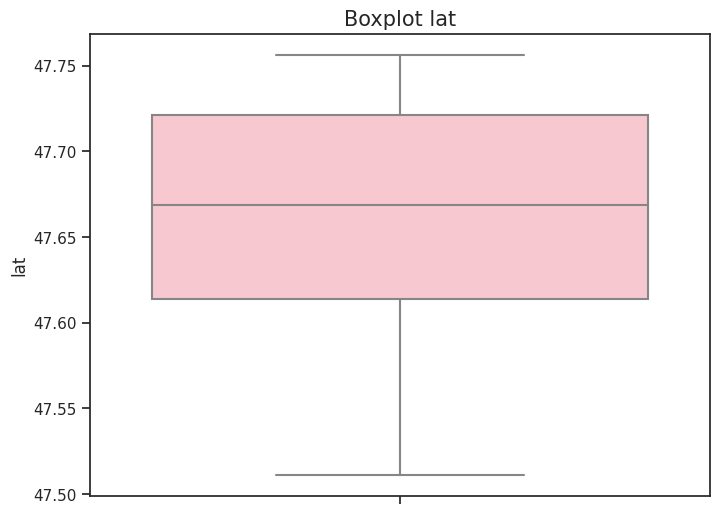

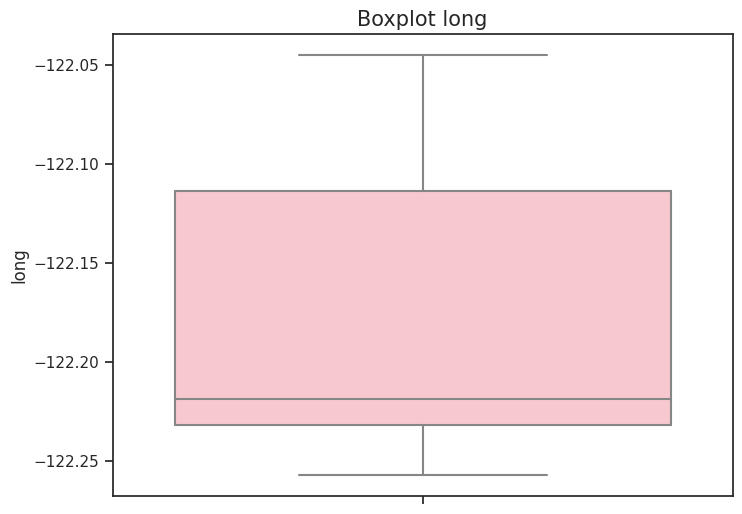

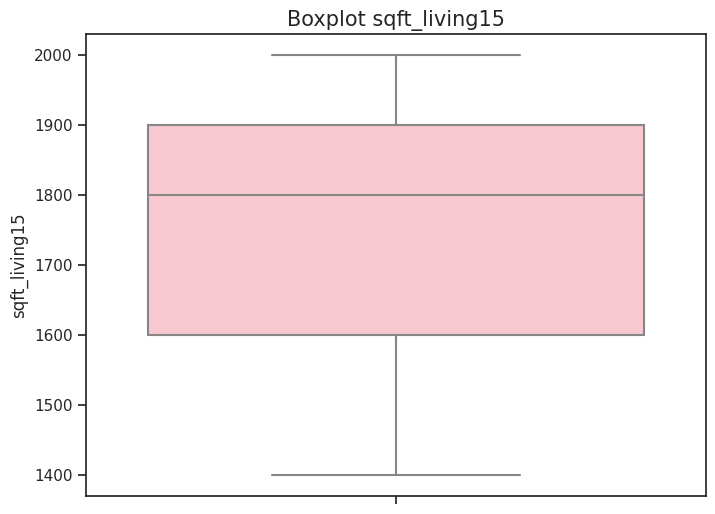

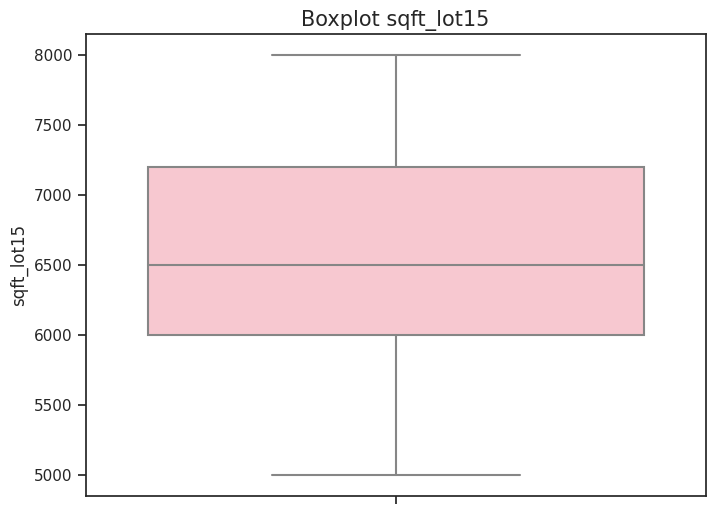

In [ ]:
# Visualisasi boxplot untuk setiap fitur
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature], color='pink')
    plt.title(f'Boxplot {feature}', size=15)
    plt.ylabel(feature, size=12)
    plt.show()


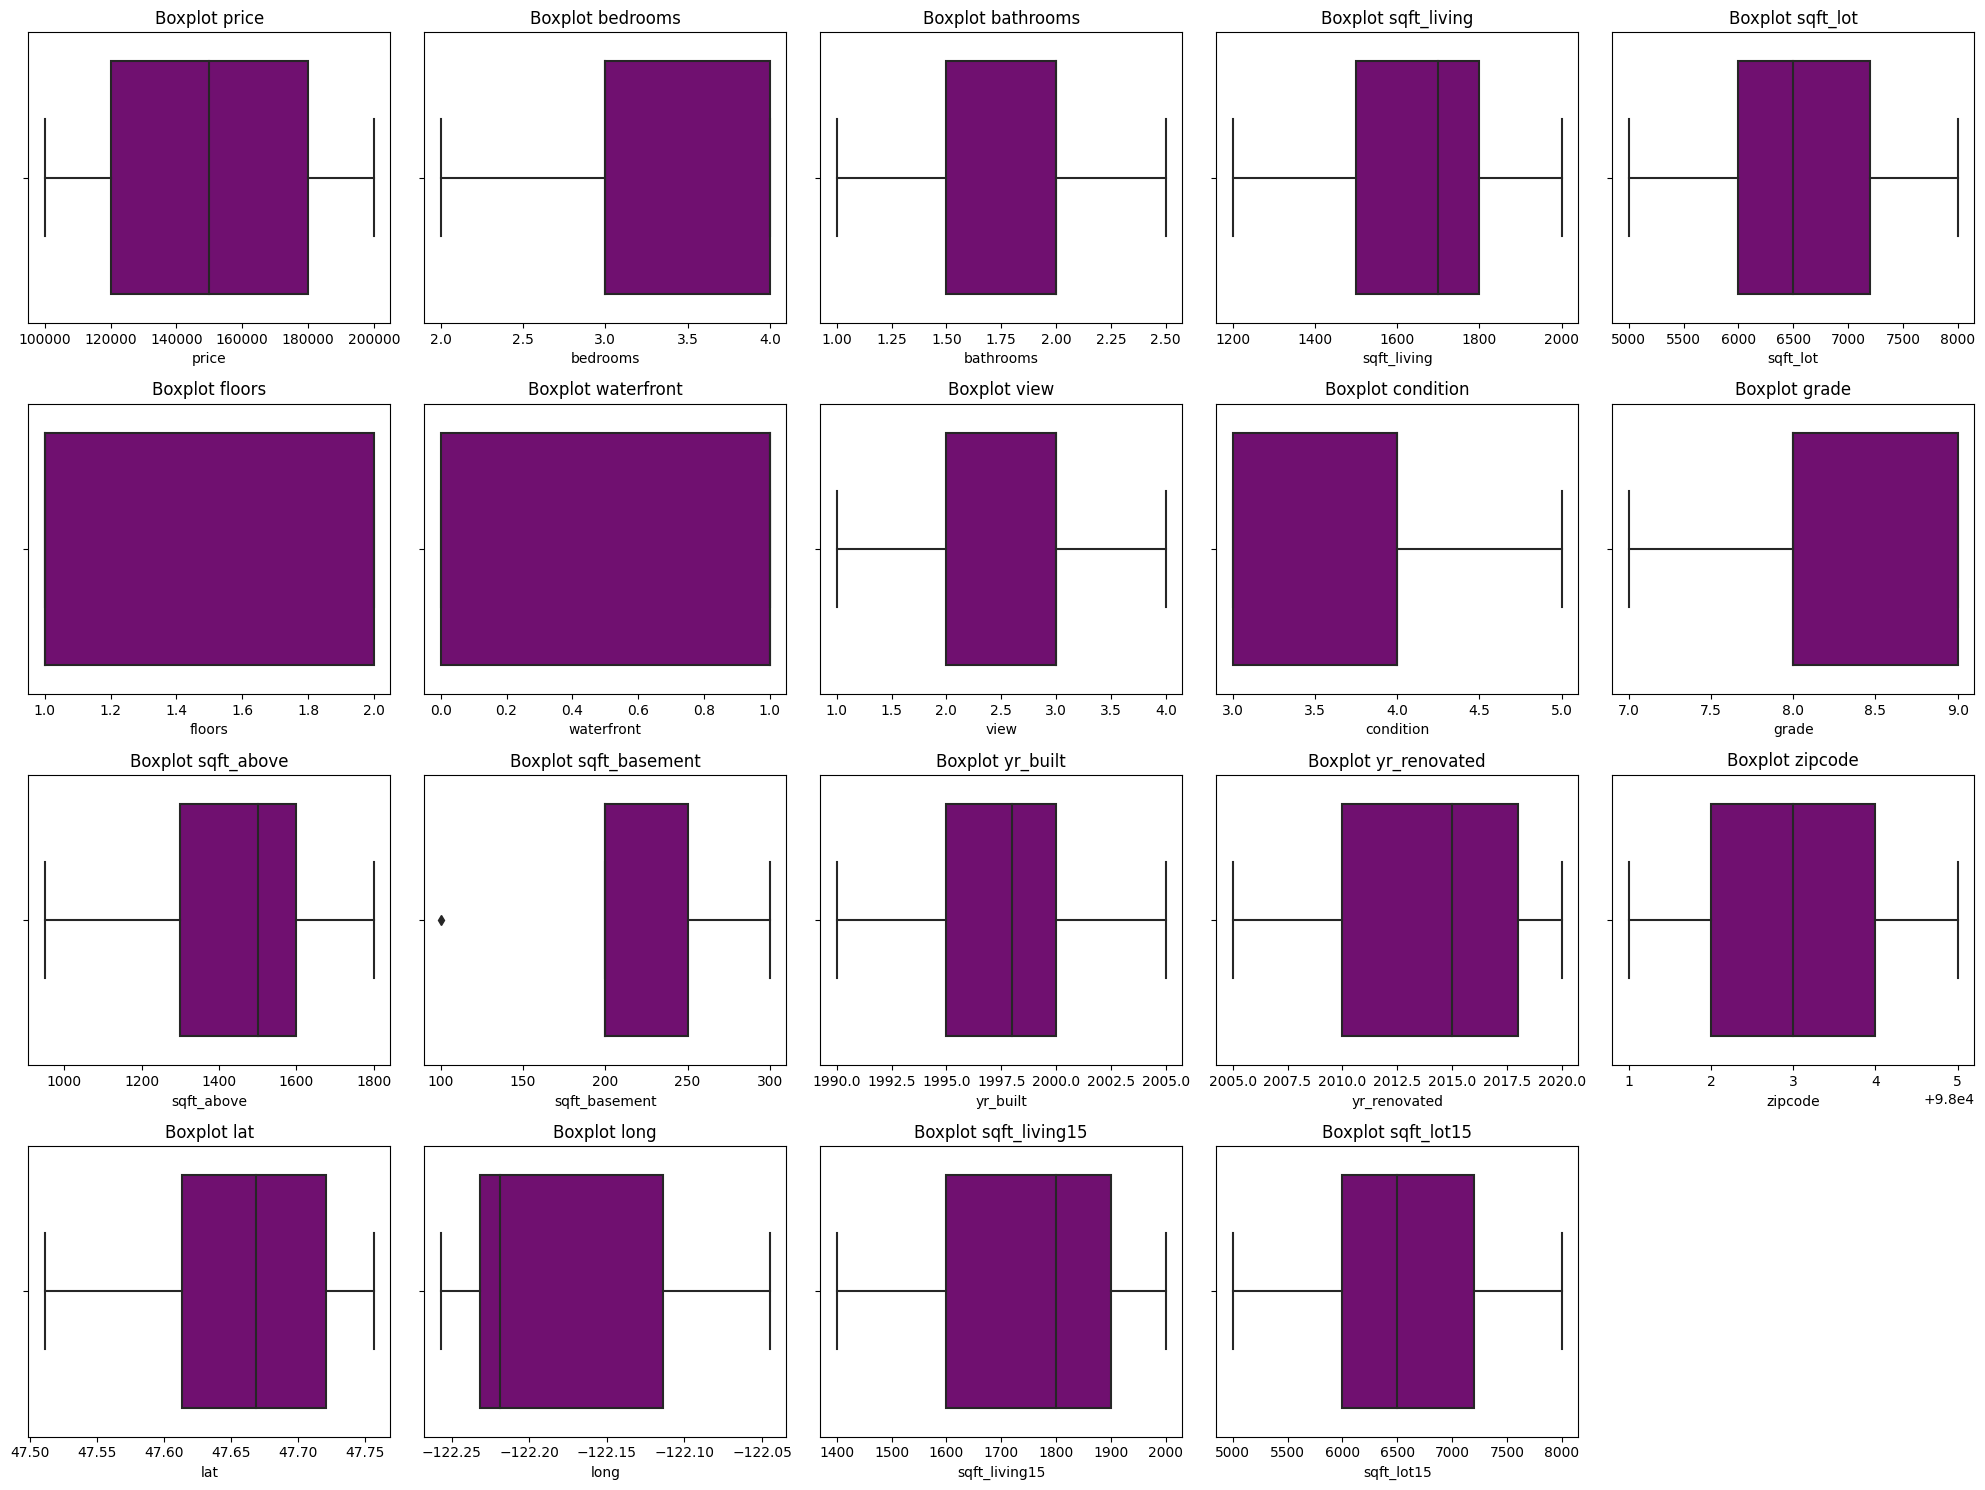

In [ ]:
# Mengatur tata letak visualisasi
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Loop melalui setiap fitur dan membuat boxplot
for i, feature in enumerate(features):
    row = i // 5  # Posisi baris
    col = i % 5   # Posisi kolom
    ax = axes[row, col]
    sns.boxplot(x=df[feature], ax=ax, color='purple')
    ax.set_title(f'Boxplot {feature}')
    ax.set_xlabel(feature)

# Menghilangkan subplots yang tidak digunakan
for i in range(len(features), 4 * 5):
    fig.delaxes(axes.flatten()[i])

# Mengatur tata letak dan menampilkan visualisasi
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

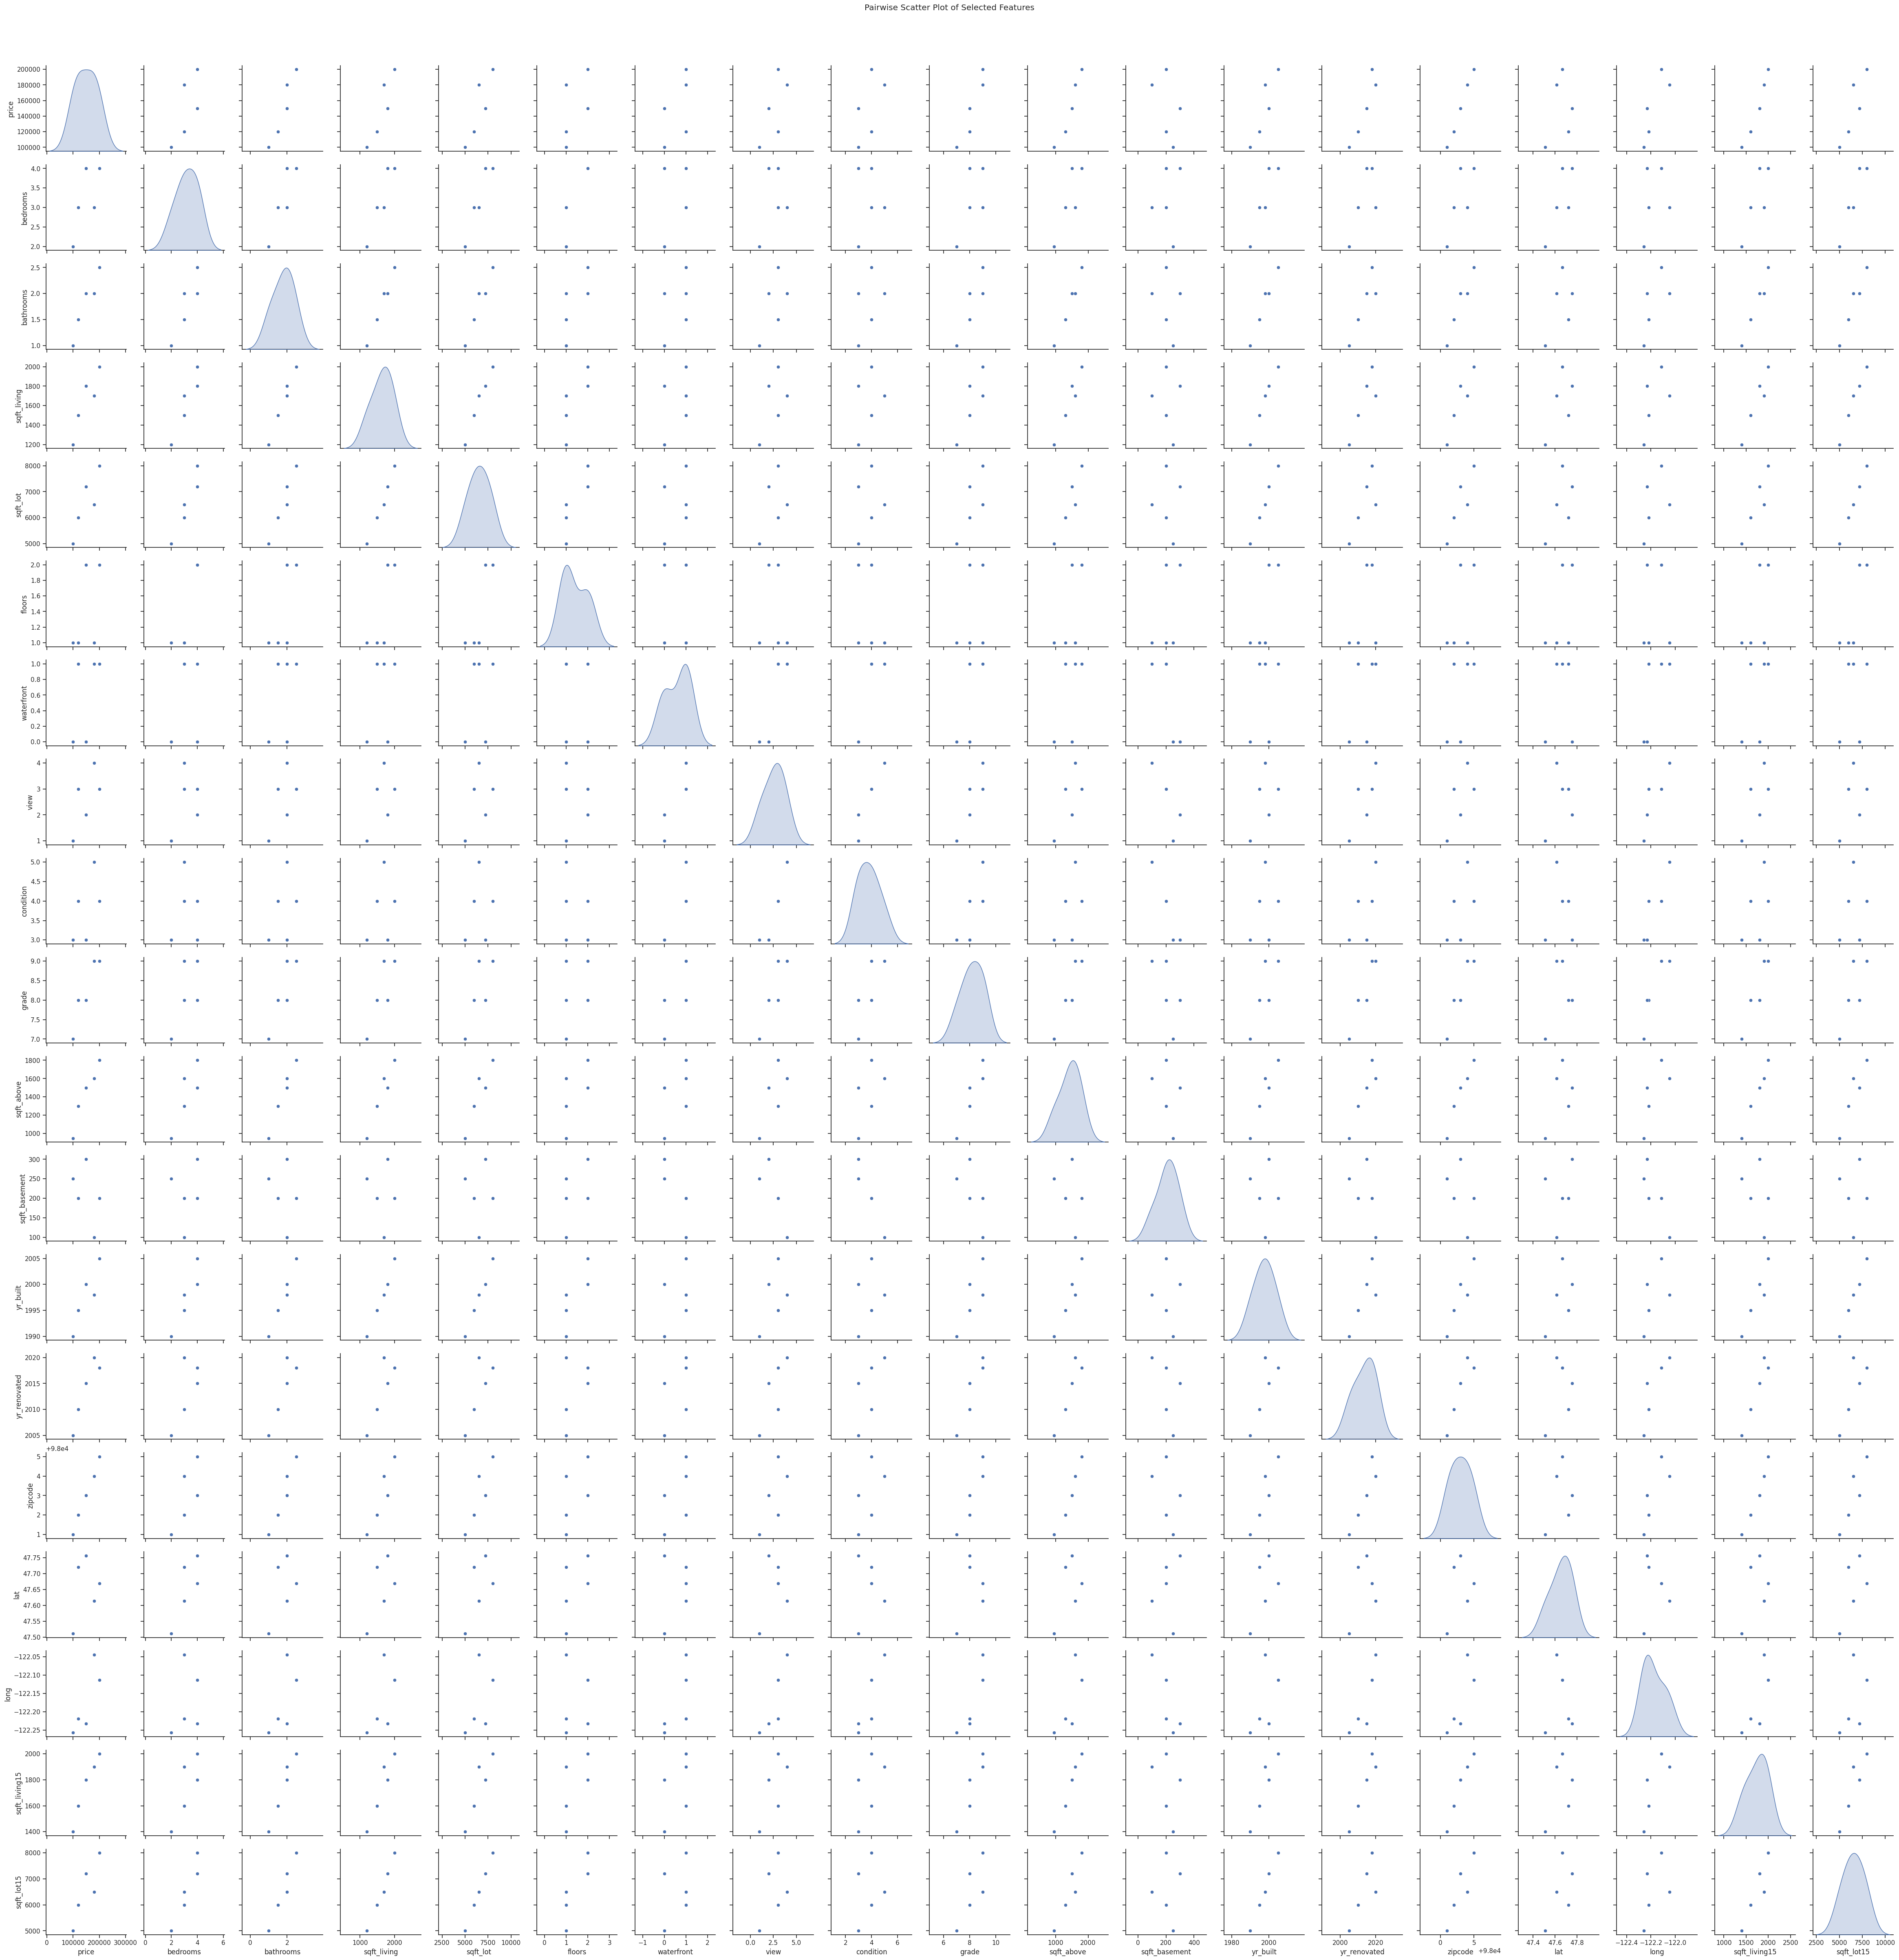

In [ ]:
# Fitur-fitur yang akan divisualisasikan
selected_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                     'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Mengatur tata letak visualisasi
sns.set(style="ticks")

# Membuat scatter plot untuk setiap pasang fitur
scatter_plot = sns.pairplot(df[selected_features], kind="scatter", diag_kind="kde", palette="husl")

# Mengatur judul
scatter_plot.fig.suptitle("Pairwise Scatter Plot of Selected Features", y=1.02)

# Menampilkan visualisasi
plt.show()


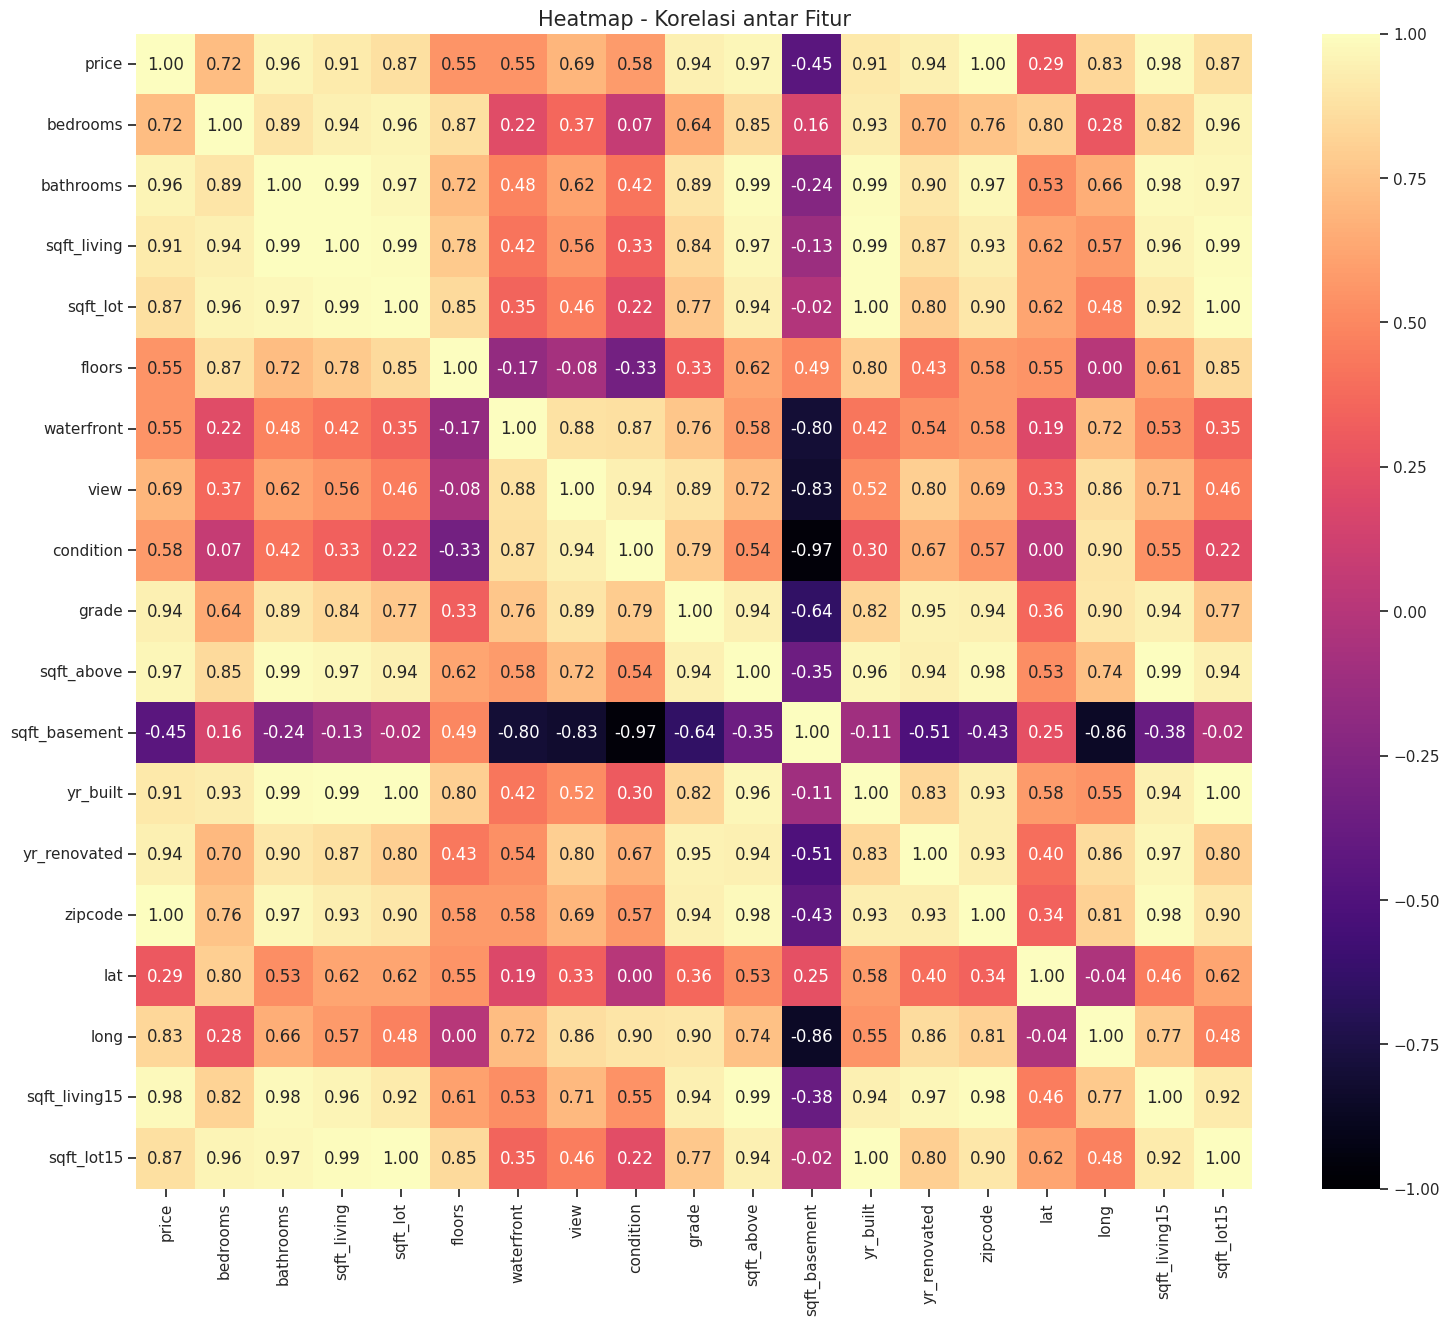

In [ ]:
# Fitur-fitur yang akan divisualisasikan
selected_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                     'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Menghitung matriks korelasi untuk fitur-fitur yang dipilih
correlation_matrix_selected = df[selected_features].corr()

# Mengatur tata letak visualisasi
sns.set(style="ticks")

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap - Korelasi antar Fitur', size=15)
plt.show()


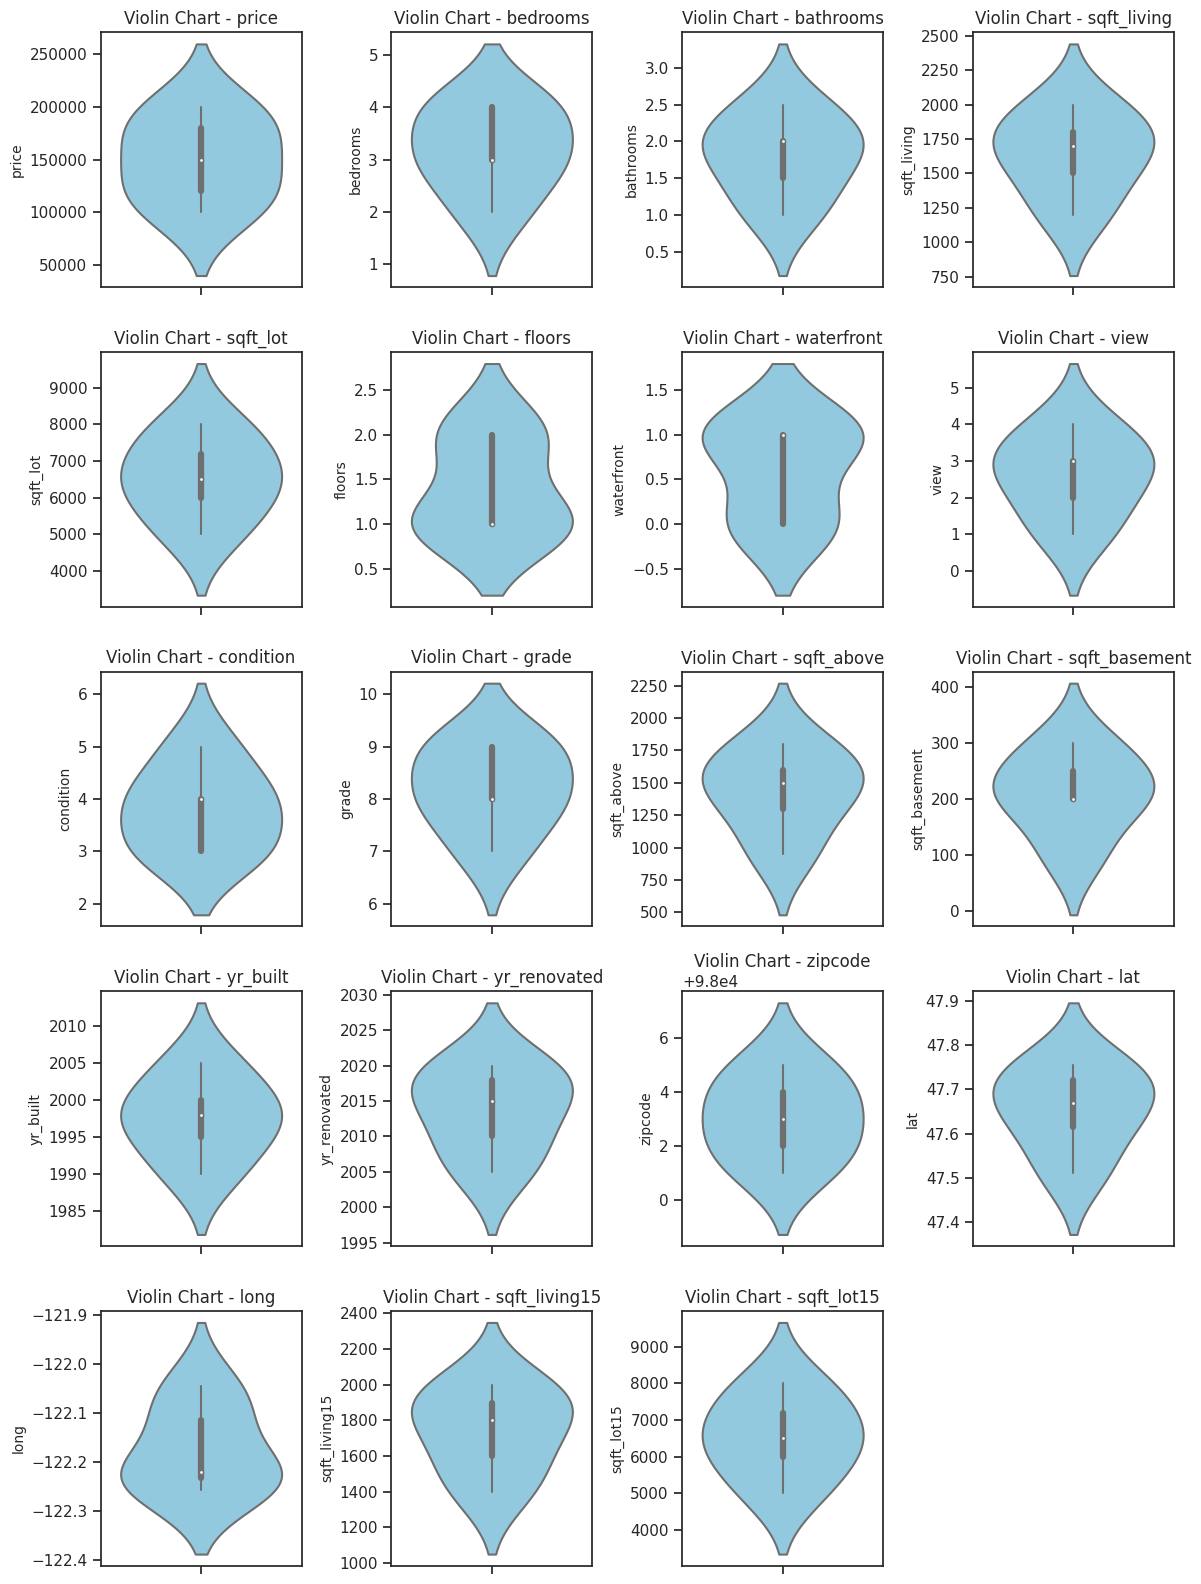

In [ ]:
# Mengatur tata letak secara rapi
plt.figure(figsize=(12, 16))

# Fitur-fitur yang akan divisualisasikan
selected_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                     'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Membuat violin chart untuk setiap fitur
for i, feature in enumerate(selected_features):
    plt.subplot(5, 4, i+1)
    sns.violinplot(y=df[feature], color='skyblue')
    plt.title(f'Violin Chart - {feature}', size=12)
    plt.ylabel(feature, size=10)

# Mengatur tata letak dan menampilkan plot
plt.tight_layout()
plt.show()
